# D208 Task One: Multiple Linear Regression

##### Submitted by Kimberly Hubacek Student ID: 001249836

#### TELEMONOP Communications seeks to increase customer tenure and reduce customer churn. This report evaluates customer data from the past year to look for services that are correlated with longer customer tenure. This information will be used by the marketing department to produce material.

### A1: Research Question
The research question I will examine is, “What customer demographics and TELEMONOP services are associated with longer tenure?”

### A2: Objectives of Analysis
The objective of this analysis is to utilize a multiple linear regression model to learn if there is a relationship between tenure and other variables in the dataset, specifically data that represents customer demographics and services offered by TELEMONOP. Identifying factors that are associated with longer tenure will allow TELEMONOP’s marketing team to create advertisements catered to specific demographics while informing customers of services.

### B1. Assumptions of Multiple Regression
Multiple linear regression demonstrates if a correlation between a single target variable and multiple explanatory variables is present. The target variable must be numerical, and the explanatory variables must also be numerical or converted to numerical data from categorical data. Like linear regression, multiple linear regression demonstrates relationships by comparing the data points of a variable in a graph to the slope of a line. 
For a multiple linear regression model to be successful, these four assumptions must be followed:

1)	There must be a linear relationship between the target variable and the explanatory variables. 


2)	There must be no multicollinearity (correlation) between the explanatory variables. 


3)	All observations must be independent from each other. 


4)	The residuals have constant variance at every point in the linear model and have no discernable pattern when graphed or plotted. This is called homoscedasticity (Zach, 2021). 

### B2. Justification of Tools

This analysis was performed with the Python programming language. Python’s simple syntax and intuitive layout allowed me to easily read and edit code. Python’s readability has made it one of the most popular programming languages in the world. Since Python is utilized by more people than R, programmers have a higher likelihood of finding outside help if they need to troubleshoot their code. Python also has many modules, tools, and libraries that support machine learning and data science tasks (Payne, 2022).

The data frame was loaded, viewed, and manipulated with Pandas. Pandas is a data frame structure in Python used for data science and machine learning projects. It has similar functions as Excel spreadsheets and SQL tables, but Pandas can manage larger files since it is more powerful (Stojiljković, 2023).

I used NumPy to create and manipulate arrays and matrices. Complex mathematical equations can be performed quickly without using excessive resources using NumPy. The code produced is concise and easy to read (What Is NumPy? — NumPy v1.25 Manual, n.d.)

Matplotlib and Seaborn were used to create all visualizations. Matplotlib was created    off NumPy and allows users to easily create basic to highly detailed graphs quickly without using excessive computing resources. Seaborn acts as an extension to Matplotlib and offers more customization options and statistical functions. Both these tools made creating detailed visualizations in Python simple (GeeksforGeeks, 2022).

I used Statsmodels to perform the multiple linear regression and feature elimination. Statsmodels is a Python module used for running statistical tests and data explorations. The Statsmodels OLS Report provided statistical measurements of the data that I used to evaluate the multiple linear regression models, unlike scikit-learn’s multiple linear regression tool (Sutton, 2022). 

### B3. Justification of Multiple Regression

Multiple linear regression was the best tool for this analysis. It compares one numerical dependent variable multiple numerical explanatory variables. TELEMONOP needed to evaluate multiple variables for correlation with Tenure, a numerical variable. 
Linear regression and logistic regression were not suitable for this analysis. While linear regression uses the slope of a line to determine correlation, it only compares one numerical explanatory variable to the numerical target variable. Logistic regression requires a categorical target variable.

In [1]:
#Jupyter Notebook Ver. 6.3, Python ver. 3.9

In [2]:
# Loading libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols
import statistics
from scipy import stats
import math
import sklearn
from sklearn import  preprocessing
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
# Loading dataset and renaming it 'churn'
churn = pd.read_csv("D208Churn.csv")

In [4]:
#Setting the display to preview the maximum number of columns instead of just a few
pd.set_option("display.max_columns", None)

In [5]:
# Info about dataset including column names and non-null values values in each column
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
#Data frame shape
print(churn.shape)


(10000, 50)


In [7]:
print(churn)

      CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West B

In [8]:
#There are some issues with excessive decimals with numbers that should be whole numbers.

In [9]:
#basic statistics for dataset
churn.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


# DATA CLEANING

### C1, C3. Data Cleaning Preparations and Code

Cleaning the data was the first step in preparing the data for multiple linear regression.
To clean the churn data in preparation for multiple linear regression, I detected and treated all null values, duplicates, renamed columns for clarity and detected and treated outliers. I also converted all the float data type columns to integer data type columns, except MonthlyCharge. This transformed them from numbers with six rounded decimal places to whole numbers. Please see cells 10 - 48 of this notebook for all code and output related to data cleaning.

First, I detected all null values in the data set using a combination of Pandas’ isnull and sum functions. This returned the name of all columns along with the total number of null values found in each column. The function showed no null values in the data frame.

#### Detecting Null Values

In [10]:
churn.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

#### Detecting Duplicates

Next, I checked the dataset for duplicate rows using a combination of Pandas’ duplicated and sum functions. This returned a table of the columns represented by a number and a bool “True/False” statement which indicated if a column had duplicates. All the columns returned a “False” value, indicating there were no duplicate rows in the data set. 

In [11]:
churn.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool>

#### Converting Numerical Data

I converted all float data type columns except MonthlyCharge to integer data type columns to convert them to whole numbers. All float columns were rounded to six decimal places except for the Income column which was rounded to two decimal places. None of the values require decimal points. For example, annual incomes are represented by whole numbers. Likewise, Tenure data which represents the number of months a customer has had service with TELEMONOP is typically a whole number. I kept MonthlyCharge as a float data type, but I rounded the values to two decimal places instead of six decimal places. Monthly charges on bills usually have a whole number with two decimal places to represent dollars and cents. 

In [12]:
##Converting float64 columns to int64 columns to generate whole numbers. Leaving MonthlyCharge as float64
churn["Lat"] = churn["Lat"].apply(np.int64)
churn["Lng"] = churn["Lng"].apply(np.int64)
churn["Income"] = churn["Income"].apply(np.int64)
churn["Outage_sec_perweek"] = churn["Outage_sec_perweek"].apply(np.int64)
churn["Tenure"] = churn["Tenure"].apply(np.int64)
churn["Bandwidth_GB_Year"] = churn["Bandwidth_GB_Year"].apply(np.int64)

##Double check to make sure changes occured
print(churn.dtypes)

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                       int64
Lng                       int64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                    int64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek        int64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [13]:
##Changing MonthlyCharge to 2 decimal places
churn["MonthlyCharge"] = churn.MonthlyCharge.round(2)
print(churn.MonthlyCharge)

0       172.46
1       242.63
2       159.95
3       119.96
4       149.95
         ...  
9995    159.98
9996    207.48
9997    169.97
9998    252.62
9999    217.48
Name: MonthlyCharge, Length: 10000, dtype: float64


#### Renaming Columns

I renamed the survey response columns for clarity using Pandas’ rename function. The survey response columns were named “Item1”, “Item2” … all the way to “Item8” I renamed the columns to represent what the survey question was asking about. “Item1” was renamed “Response”, “Item2” was renamed “Fix”, “Item3” was renamed “Replacement”, “Item4” was renamed “Reliability”, “Item5” was renamed “Options”, “Item6” was renamed “Respectfulness”, “Item7” was renamed “Courteous”, and “Item8” was renamed “Listen”.

In [14]:
#Renaming the survey response columns to avoid confusion
churn.rename(columns = {'Item1':'Response',
'Item2':'Fix',
'Item3':'Replacement',
'Item4':'Reliability',
'Item5':'Options',
'Item6':'Respectfulness',
'Item7':'Courteous',
'Item8':'Listen'},
inplace=True)

#### Detecting Outliers

Lastly, I detected outliers will using boxplots. I created a boxplot for each column with quantitative data and observed to see if any outliers were present. Most outliers were retained and were explained by geographic locations and life circumstances. For example, an extremely wealthy person and a destitute person could both have service with TELEMONOP. These would show up as outliers in the boxplots. Someone living in a rural area with harsh weather may have higher outages as indicated in Outage_sec_perweek and Contacts. These would also appear as outliers. 

I retained all outliers detected in the survey response columns. The survey response columns’ data was represented on a scale from 1-8 indicating how happy or dissatisfied customers were with TELEMONOP’s customer service. Customers could have had different experiences with different customer service representatives that explain the variation in the survey responses. A true outlier would be indicated by a value of zero or a value greater than eight.

The outliers in Children were not explained by life circumstances. I replaced all outliers in Children with the median, or the number in the absolute middle of the column when ordered from least to greatest. The median for the Children column was one, representing one child living in the customer’s residence.

<AxesSubplot:xlabel='Age'>

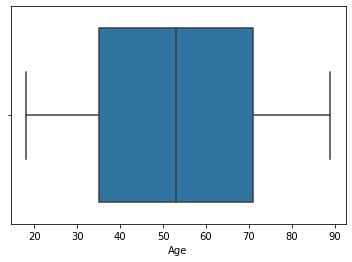

In [15]:
#Boxplot to detect outliers in Age column
sns.boxplot(x='Age', data=churn)

<AxesSubplot:xlabel='Population'>

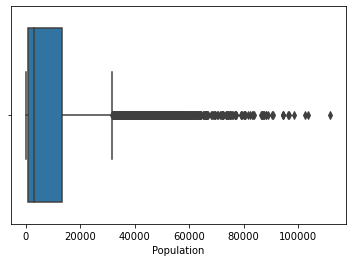

In [16]:
#Detecting Outliers in 'Population' Column
sns.boxplot(x='Population', data=churn)

In [17]:
#Population vary widely from rural to urban areas. Retaining Outliers

<AxesSubplot:xlabel='Children'>

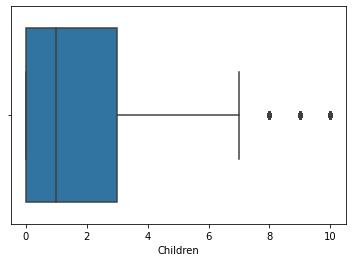

In [18]:
#Detecting Outliers in 'Children' Column
sns.boxplot(x='Children', data=churn)

(array([ 230.,  853., 1695., 2034., 1842., 1089.,  926.,  791.,  388.,
         152.]),
 array([ 79.98 , 100.998, 122.016, 143.034, 164.052, 185.07 , 206.088,
        227.106, 248.124, 269.142, 290.16 ]),
 <BarContainer object of 10 artists>)

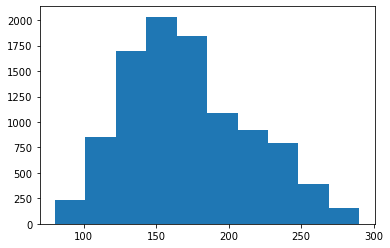

In [19]:
#Histogram of children to observe distribution
plt.hist(churn['MonthlyCharge'])

In [20]:
##New column created, Children Z-Score 

churn['ChildrenZScore']=stats.zscore(churn['Children'])

In [21]:
#Classify outliers in 'Children' as 1 and values within std as 0
churn["ChildrenOutlier"] = (abs(churn["ChildrenZScore"])>3).astype(int)

In [22]:
#Display rows with outliers in 'Children'
churn.loc[churn.ChildrenOutlier == 1]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,ChildrenZScore,ChildrenOutlier
30,31,L357432,79b827eb-46b9-4737-8484-0b670171bc4b,2024dab5fff54350716edea719cb3a9b,Whitesboro,NY,Oneida,13492,43,-75,11268,Urban,America/New_York,Air traffic controller,9,45,43383,Married,Male,No,6,14,0,0,No,Two Year,Yes,No,Fiber Optic,No,No,No,Yes,No,No,Yes,Yes,Yes,Credit Card (automatic),11,230.11,1795,3,2,1,5,3,3,3,2,3.219376,1
97,98,N417817,832e769e-3b90-47cc-8f70-12e77fbd52a2,4886325be93630732220fb84b427c7cd,Beaverville,IL,Iroquois,60912,40,-87,521,Suburban,America/Chicago,"Designer, textile",10,23,64816,Divorced,Male,Yes,5,14,1,1,No,Month-to-month,No,No,Fiber Optic,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Mailed Check,12,187.48,1956,3,2,2,4,3,2,3,2,3.685122,1
144,145,Q541158,f67c47f8-93da-4b90-babe-4cd9b9deebf6,ef10d94adbaa866559d042fc841bc744,Saint Paul,MN,Ramsey,55107,44,-93,15171,Suburban,America/Chicago,Clinical biochemist,10,76,35954,Married,Male,Yes,13,14,1,0,No,Month-to-month,No,No,None,Yes,No,No,Yes,No,No,No,Yes,Yes,Electronic Check,3,137.46,819,4,4,3,3,2,3,4,2,3.685122,1
329,330,T369132,bad7853a-c59b-4775-ad6d-05ff1d14c4b4,7ddea13b733a3edd3cca75a1939474de,Maryville,TN,Blount,37801,35,-84,26381,Urban,America/New_York,Police officer,9,19,40902,Married,Female,Yes,8,8,0,1,No,Month-to-month,Yes,No,None,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Mailed Check,11,222.68,1973,4,3,4,2,5,3,4,3,3.219376,1
334,335,O402306,c8ffb29f-7ee4-4883-8698-f6936607cd04,cd44dcee7c17a65ba74fee79b97526d9,Salmon,ID,Lemhi,83467,45,-113,5978,Suburban,America/Boise,"Therapist, music",9,79,11179,Never Married,Female,No,10,11,0,0,No,One year,No,Yes,DSL,Yes,Yes,Yes,No,No,No,No,No,Yes,Electronic Check,8,127.48,1451,3,2,2,3,4,4,4,5,3.219376,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9623,9624,Q831134,5b4ad141-b338-4638-9b10-1d0e2ce826b5,7ce5d8d9621aa54f71c403db655705fe,Granada Hills,CA,Los Angeles,91344,34,-118,53266,Urban,America/Los_Angeles,"Engineer, communications",10,79,42222,Married,Female,No,9,14,1,4,No,Month-to-month,Yes,No,DSL,Yes,Yes,No,No,No,Yes,No,Yes,No,Mailed Check,68,172.46,6432,4,5,5,3,5,3,4,2,3.685122,1
9676,9677,P834833,1f80a89f-81fd-47fd-ba1f-df8ecff04708,a10db50fc055056f5886b8f8d76afea0,Greenleaf,WI,Brown,54126,44,-88,3738,Rural,America/Chicago,Tourism officer,9,30,29388,Married,Male,No,9,8,1,1,No,One year,No,Yes,None,Yes,No,No,No,No,Yes,No,Yes,No,Mailed Check,64,127.48,5851,3,2,4,4,2,3,3,2,3.219376,1
9790,9791,U741276,5c3198d1-4138-4ba8-b0b9-652748f0c127,083153f92f7b45bb8e084885d2a6c0b1,Colorado Springs,CO,El Paso,80930,38,-104,1995,Rural,America/Denver,Patent examiner,10,31,23693,Married,Male,No,12,13,0,1,No,One year,Yes,No,Fiber Optic,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Electronic Check,71,242.63,6900,3,4,4,3,4,4,4,2,3.685122,1
9871,9872,F573675,71c2c800-8cee-434b-b60a-efa9ecbacf38,6177386284a481a7fee6728b2fda9b02,Holton,IN,Ripley,47023,39,-85,1691,Urban,America/Indiana/Indianapolis,"Horticulturist, amenity",10,18,19351,Widowed,Female,No,7,13,1,1,No,Month-to-month,No,No,DSL,Yes,No,Yes,No,Yes,No,No,Yes,Yes,Electronic Check,64,142.48,6388,3,3,3,3,4,3,4,4,3.685122,1


In [23]:
# Print total numbers of outliers in 'Children'
print("number of outliers = " + str(churn.ChildrenOutlier.value_counts()[1]))

number of outliers = 191


In [24]:
#Outliers in children will be replaced with median due to previously observed skew and large quantity of outliers
# find median of 'Children'
churn['Children'].median()

1.0

In [25]:
#replace outliers of 'Children' with median
churn['Children'].replace([7,8,9,10],1, inplace=True)

<AxesSubplot:xlabel='Children'>

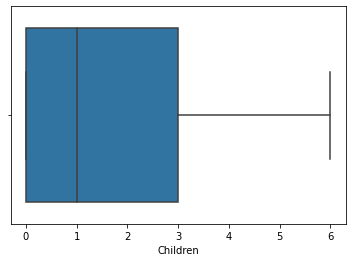

In [26]:
#rechecking children for outliers
sns.boxplot(x='Children', data=churn)

In [27]:
#dropping ChildrenZScore and ChildrenOutlier from dataframe
churn=churn.drop(['ChildrenZScore', 'ChildrenOutlier'], axis=1)

<AxesSubplot:xlabel='Income'>

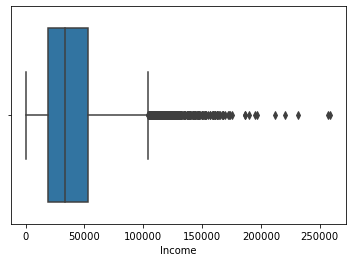

In [28]:
#Detecting Outliers in 'Income' Column
sns.boxplot(x='Income', data=churn)

In [29]:
#Income varies based on profession. retaining outliers

<AxesSubplot:xlabel='Outage_sec_perweek'>

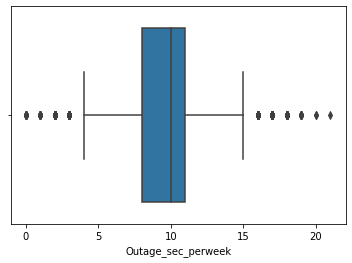

In [30]:
#Detecting Outliers in 'Outage_sec_perweek' Column
sns.boxplot(x='Outage_sec_perweek', data=churn)

In [31]:
#Outages can vary based on geographical location and weather patterns. retaining

<AxesSubplot:xlabel='Email'>

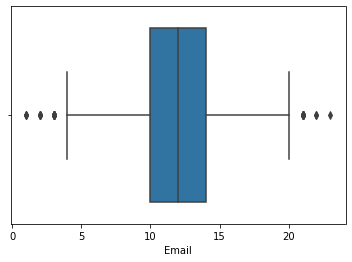

In [32]:
#Detecting Outliers in 'Email' Column
sns.boxplot(x='Email', data=churn)

In [33]:
#Emails include service correspondence and marketing. If a customer has longer tenure, I'd expect less emails. if a customer just opened an account, I'd expect more. Retaining outliers

<AxesSubplot:xlabel='Contacts'>

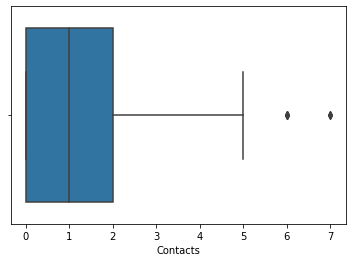

In [34]:
#Detecting Outliers in 'Contacts' Column
sns.boxplot(x='Contacts', data=churn)

In [35]:
#People having technical difficulties would have a higher number of contacts. Retaining outliers

<AxesSubplot:xlabel='Tenure'>

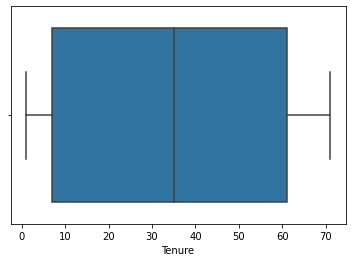

In [36]:
#Detecting outliers in "Tenure" Column
sns.boxplot(x='Tenure', data=churn)

<AxesSubplot:xlabel='MonthlyCharge'>

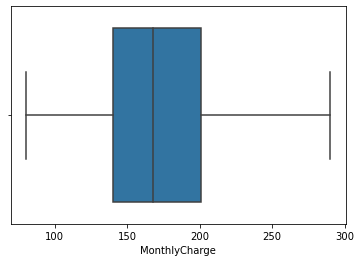

In [37]:
#Detecting Outliers in 'MonthlyCharge' Column
sns.boxplot(x='MonthlyCharge', data=churn)

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

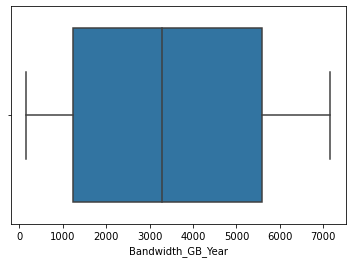

In [38]:
#Detecting Outliers in 'Bandwidth_GB_Year' Column
sns.boxplot(x='Bandwidth_GB_Year', data=churn)

<AxesSubplot:xlabel='Response'>

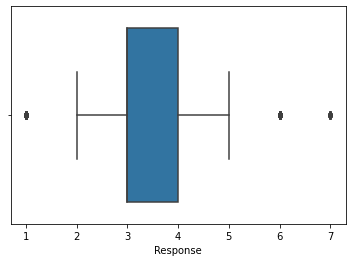

In [39]:
#Detecting Outliers in 'Responses' Column
sns.boxplot(x='Response', data=churn)

<AxesSubplot:xlabel='Fix'>

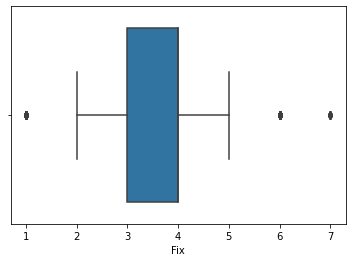

In [40]:
#Detecting Outliers in 'Fix' Column
sns.boxplot(x='Fix', data=churn)

<AxesSubplot:xlabel='Replacement'>

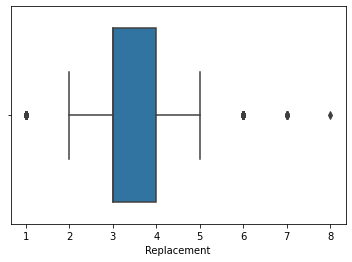

In [41]:
#Detecting Outliers in 'Replacement' Column
sns.boxplot(x='Replacement', data=churn)

<AxesSubplot:xlabel='Reliability'>

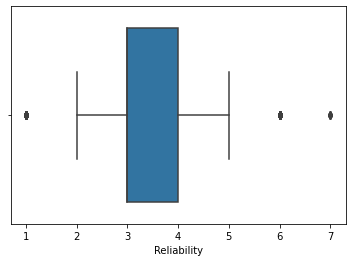

In [42]:
#Detecting Outliers in 'Reliability' Column
sns.boxplot(x='Reliability', data=churn)

<AxesSubplot:xlabel='Options'>

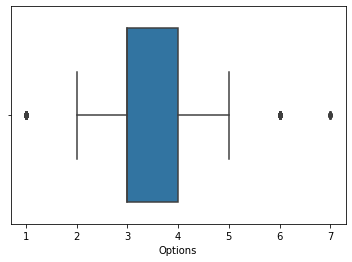

In [43]:
#Detecting Outliers in 'Options' Column
sns.boxplot(x='Options', data=churn)

<AxesSubplot:xlabel='Respectfulness'>

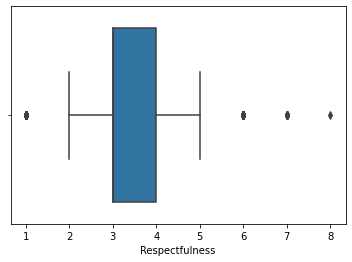

In [44]:
#Detecting Outliers in 'Respectfulness' Column
sns.boxplot(x='Respectfulness', data=churn)

<AxesSubplot:xlabel='Courteous'>

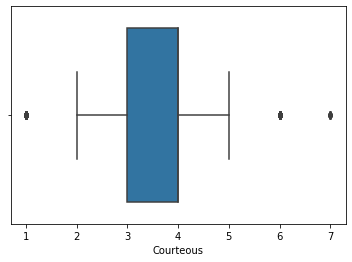

In [45]:
#Detecting Outliers in 'Courteous' Column
sns.boxplot(x='Courteous', data=churn)

<AxesSubplot:xlabel='Listen'>

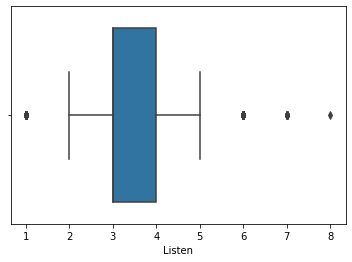

In [46]:
#Detecting Outliers in 'Listen' Column
sns.boxplot(x='Listen', data=churn)

In [47]:
#All outliers in the survey response columns will be retained since they are on a 1-8 scale and customers have different ideas of what constitutes good customer service.

# C2. Summary Statistics

Next, I explored the variables used in the regression model using Pandas’ describe function to call the statistics for each variable. The describe function displays the total number of rows in a column as the count. Next was the mean, or average. The average is calculated by adding all the values of the column together and dividing that by the total number of rows in the column. Below the mean is the standard deviation. The standard deviation informs the reader how far each value is from the average or mean. The minimum is the lowest value in the column. Next is the 25th percentile value. Twenty-five percent of all the data are equal to or less than the number reported in the 25th percentile. The 50th percentile is also known as the median. It is the middle value in the column when the numbers are ordered from least to greatest, with half the data less than the value of the median and half of the data greater than the median, The 75th percentile number indicates 75% of the values in the column are less than this number while 25% are greater than this number. Lastly, the max number is the highest value in the column.
Summary statistics are only performed on numeric variables. To gain more insight into categorical variables, I used Pandas’ value counts function to return the total occurrences of each category in the column. This data can be used to calculate the percentages of each category within a column. 

Summary statistics have been provided for the target variable, Tenure, and all explanatory variables. The full code for Summary statistics can be found in cells 49 – 69 of this notebook.

Let us start with the target variable, Tenure. Tenure represents the number of months a customer has had service with TELEMONP. The shortest amount of time a customer has been with the company is one month with the longest time being 71 months. The mean or average tenure is 34 months.

In [48]:
#Summary Statistics for Tenure
churn.Tenure.describe()

count    10000.000000
mean        34.026200
std         26.442622
min          1.000000
25%          7.000000
50%         35.000000
75%         61.000000
max         71.000000
Name: Tenure, dtype: float64

Let us start with the target variable, Tenure. Tenure represents the number of months a customer has had service with TELEMONP. The shortest amount of time a customer has been with the company is one month with the longest time being 71 months. The mean or average tenure is 34 months.

In [49]:
#Summary statistics for Age
churn.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

The age of TELEMONOP’s customers ranges from 18 to 89 years of age. The average customer age is 53 years old.

In [50]:
#Summary statistics for Children
churn.Children.describe()

count    10000.00000
mean         1.66700
std          1.50424
min          0.00000
25%          0.00000
50%          1.00000
75%          3.00000
max          6.00000
Name: Children, dtype: float64

Children represents the total number of children living in the customer’s residence. The average customer has two children. Some of TELEMONOP’s customers are childless while the largest household reported six children.

In [51]:
#Summary statistics for Income
churn.Income.describe()

count     10000.000000
mean      39806.433300
std       28199.927051
min         348.000000
25%       19224.000000
50%       33170.000000
75%       53245.500000
max      258900.000000
Name: Income, dtype: float64

Income represents the annual income of the account holder. The average TELEMONOP customer earns $39,806 a year. The lowest reported annual income is $348 while the highest is $258,900. This is a large spread, but this is expected as TELEMONOP provides service across the United States to people of different income levels. Someone living in an urban area would require a higher income than someone living in a rural area, for example.

In [52]:
#Value counts for Marital
churn.value_counts('Marital')

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
dtype: int64

The Marital column data represents the marital status of TELEMONOP customers. Each marital status has a relatively even distribution. The highest percentage of customers are divorced at 21% while the lowest percentage of customers are married at 19%

In [53]:
#Value counts for Gender
churn.value_counts('Gender')

Gender
Female       5025
Male         4744
Nonbinary     231
dtype: int64

The Gender column represents the gender identity of TELEMONOP customers. The largest gender demographic is female at 50% of the account holders. The smallest gender demographic is nonbinary at 2%.

In [54]:
#Value counts for Area
churn.value_counts('Area')

Area
Suburban    3346
Rural       3327
Urban       3327
dtype: int64

Area represents the type of area where the customer resides. While all three categories are almost evenly distributed, TELEMONOP has the most customers in suburban areas.

In [55]:
#Summary statistics for Bandwidth_GB_Year
churn.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3391.838800
std       2185.288939
min        155.000000
25%       1236.000000
50%       3279.000000
75%       5586.000000
max       7158.000000
Name: Bandwidth_GB_Year, dtype: float64

Bandwidth Gigabyte Per Year represents the total bandwidth customers have used up to this point in the year. The least usage is 155 gigabytes while the highest usage is 7,158 gigabytes. The average data consumption for TELEMONOP customers is 3,392 gigabytes per year. 

In [56]:
#Value counts for Contract
churn.value_counts('Contract')

Contract
Month-to-month    5456
Two Year          2442
One year          2102
dtype: int64

This column represents the contract length of each customer at TELEMONOP. The highest percentage of customers have a month-to-month contract at 54%, followed by two-year contracts at 54% and finally one-year contracts at 21%. 

In [57]:
#Value counts for Techie
churn.value_counts('Techie')

Techie
No     8321
Yes    1679
dtype: int64

Do TELEMONOP customers consider themselves good with technology? Only 17% consider themselves adept at dealing with technology while 83% do not think they are good with technology.

In [58]:
#Value counts for InternetService
churn.value_counts('InternetService')

InternetService
Fiber Optic    4408
DSL            3463
None           2129
dtype: int64

Internet Service represents the type of internet service each customer has from TELEMONOP. Most customers have fiber optic internet at 44%, followed by DSL internet service at 35%. 21% of customers have no internet service with TELEMONOP.

In [59]:
#Value counts for Port_modem
churn.value_counts('Port_modem')

Port_modem
No     5166
Yes    4834
dtype: int64

Do customers have a portable modem? 48% of customers are leasing a portable from TELEMONOP while 52% of customers do not have a portable modem.

In [60]:
#Value counts for Tablet
churn.value_counts('Tablet')

Tablet
No     7009
Yes    2991
dtype: int64

Only 30% of TELEMONOP customers own a tablet. 70% of customers do not own a tablet.

In [61]:
#Value counts for Phone
churn.value_counts('Phone')

Phone
Yes    9067
No      933
dtype: int64

91% of customers have phone service through TELEMONOP while 30% do not have phone service.

In [62]:
#Value counts for Multiple
churn.value_counts('Multiple')

Multiple
No     5392
Yes    4608
dtype: int64

54% of TELEMONOP customers have more than one phone or internet line. 46% of customers have one line or no lines with TELEMONOP.

In [63]:
#Value counts for OnlineSecurity
churn.value_counts('OnlineSecurity')

OnlineSecurity
No     6424
Yes    3576
dtype: int64

64% of customers have an online security add-on. 36% of TELEMONOP customers do not have a subscription for online security through TELEMONOP.

In [64]:
#Value counts for OnlineBackup
churn.value_counts('OnlineBackup')

OnlineBackup
No     5494
Yes    4506
dtype: int64

55% of customers have an online cloud back up account through TELEMONOP. 45% of customers do not have an online cloud account.

In [65]:
#Value counts for DeviceProtection
churn.value_counts('DeviceProtection')

DeviceProtection
No     5614
Yes    4386
dtype: int64

44% of TELEMONOP customers have a device protection plan. 57% of customers do not have an online protection plan.

In [66]:
#Value counts for TechSupport
churn.value_counts('TechSupport')

TechSupport
No     6250
Yes    3750
dtype: int64

38% of customers have a tech support plan through TELEMONOP. 62% of customers do not have a tech support plan. 

In [67]:
#Value counts for StreamingTV
churn.value_counts('StreamingTV')

StreamingTV
No     5071
Yes    4929
dtype: int64

49% of customers stream television shows through TELEMONOP. 51% of customers do not stream television shows.

In [68]:
#Value counts for StreamingMovies
churn.value_counts('StreamingMovies')

StreamingMovies
No     5110
Yes    4890
dtype: int64

49% of customers stream movies through TELEMONOP. 51% of customers do not stream movies. 

### C4. Univariate and Bivariate Visuals
Below are visualizations of all the variables for the multiple linear regression model. Please see cells 70 – 112 for all univariate and biviariate visuals.

##### Tenure - Target Variable

Text(0.5, 1.0, 'Tenure')

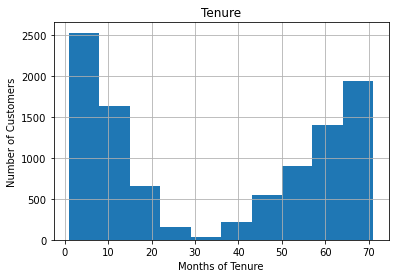

In [69]:
#Univariate
churn.hist('Tenure')
plt.xlabel('Months of Tenure')
plt.ylabel('Number of Customers')
plt.title('Tenure')

We can see Tenure has a bimodal distribution. Most customers have had service with TELEMONOP for 0-25 months or 40 – 70 months.

##### Age

Text(0.5, 1.0, 'Age of Customers')

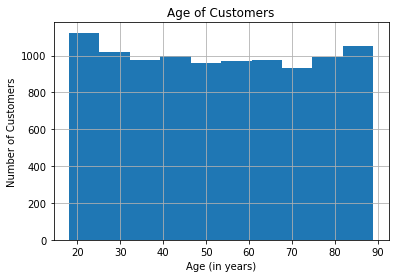

In [70]:
#Univariate
churn.hist('Age')
plt.xlabel('Age (in years)')
plt.ylabel('Number of Customers')
plt.title('Age of Customers')

Text(0.5, 1.0, 'Relationship of Customer Age VS. Customer Tenure')

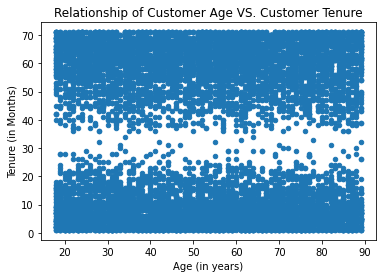

In [71]:
#Bivariate with Tenure
churn.plot(kind='scatter', x='Age', y='Tenure')
plt.xlabel('Age (in years)')
plt.ylabel('Tenure (in Months)')
plt.title('Relationship of Customer Age VS. Customer Tenure')

Age has a relatively even distribution. Age does not appear to have an observable relationship with Tenure.

##### Children

Text(0.5, 1.0, 'Children')

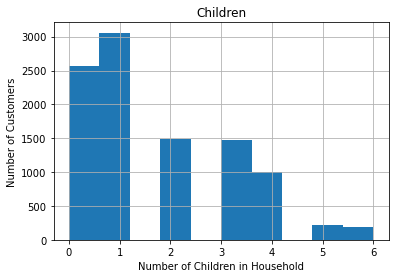

In [72]:
#Univariate
churn.hist('Children')
plt.xlabel('Number of Children in Household')
plt.ylabel('Number of Customers')
plt.title('Children')

Text(0.5, 1.0, 'Relationship of Number of Children per Customer Household VS. Customer Tenure')

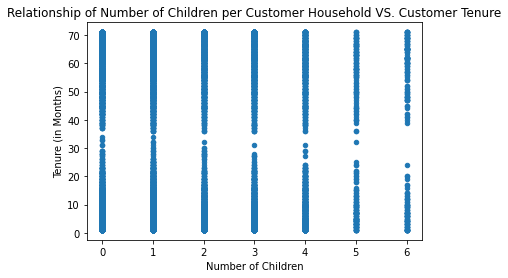

In [73]:
#Bivariate with Tenure
churn.plot(kind='scatter', x='Children', y='Tenure')
plt.xlabel('Number of Children')
plt.ylabel('Tenure (in Months)')
plt.title('Relationship of Number of Children per Customer Household VS. Customer Tenure')

The distribution in Children is skewed right. There does not appear to be an observable relationship between Children and Tenure.

##### Income

Text(0.5, 1.0, 'Annual Income')

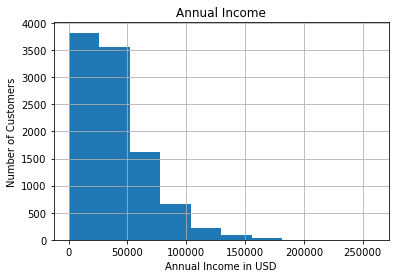

In [74]:
#Univariate
churn.hist('Income')
plt.xlabel('Annual Income in USD')
plt.ylabel('Number of Customers')
plt.title('Annual Income')

Text(0.5, 1.0, 'Relationship of Customer Annual Income VS. Customer Tenure')

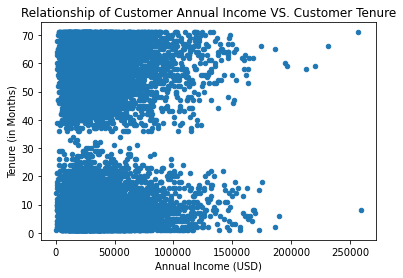

In [75]:
#Bivariate with Tenure
churn.plot(kind='scatter', x='Income', y='Tenure')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Tenure (in Months)')
plt.title('Relationship of Customer Annual Income VS. Customer Tenure')

The distribution of Income is scewed right. More higher income households have longer tenure than shorter tenure.

##### Marital

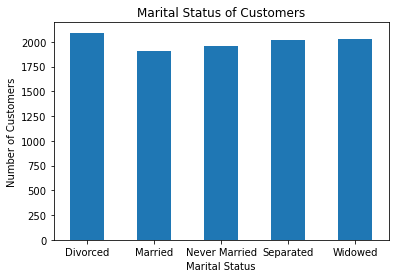

In [76]:
#Univariate

churn.groupby('Marital').size().plot.bar(rot=0)
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.title('Marital Status of Customers')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Marital Status vs Customer Tenure')

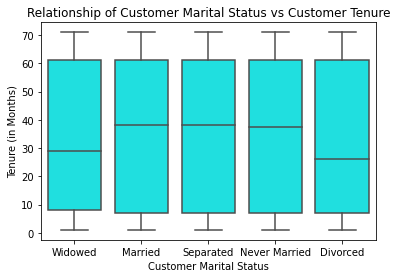

In [77]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="Marital", y='Tenure', color="cyan")
plt.xlabel("Customer Marital Status")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Marital Status vs Customer Tenure")

The Marital data is evenly distributed. Widowed and divorced customers have shorter tenure compared to other marital statuses.

##### Gender

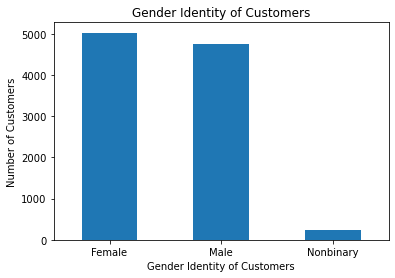

In [78]:
#Univariate

churn.groupby('Gender').size().plot.bar(rot=0)
plt.xlabel('Gender Identity of Customers')
plt.ylabel('Number of Customers')
plt.title('Gender Identity of Customers')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Gender Identity vs Customer Tenure')

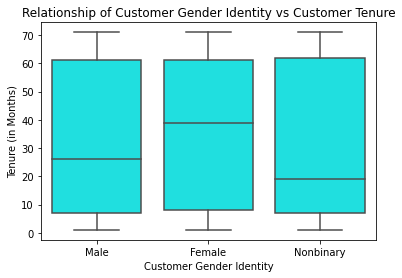

In [79]:
#Bivariate with Tenure

sns.boxplot(data=churn, x="Gender", y='Tenure', color="cyan")
plt.xlabel("Customer Gender Identity")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Gender Identity vs Customer Tenure")

The majority of customers identify as female or male. Female customers have longer tenure.

##### Area

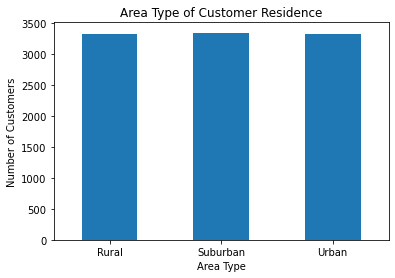

In [80]:
#Univariate
churn.groupby('Area').size().plot.bar(rot=0)
plt.xlabel('Area Type')
plt.ylabel('Number of Customers')
plt.title('Area Type of Customer Residence')
plt.show()

Text(0.5, 1.0, "Relationship of The Area Type of the Customer's Residence vs Customer Tenure")

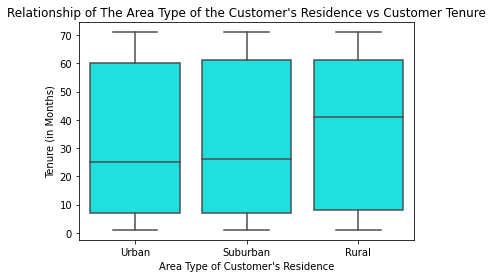

In [81]:
#Bivariate with Tenure

sns.boxplot(data=churn, x="Area", y='Tenure', color="cyan")
plt.xlabel("Area Type of Customer's Residence")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of The Area Type of the Customer's Residence vs Customer Tenure")

Customers are evenly distributed among the different area types. Customers in rural areas have longer tenure than other area types. 

##### MonthlyCharge

Text(0.5, 1.0, 'Monthly Charge')

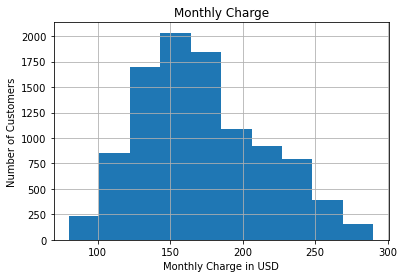

In [82]:
#Univariate
churn.hist('MonthlyCharge')
plt.xlabel('Monthly Charge in USD')
plt.ylabel('Number of Customers')
plt.title('Monthly Charge')

Text(0.5, 1.0, 'Relationship of Customer Monthly Charge VS. Customer Tenure')

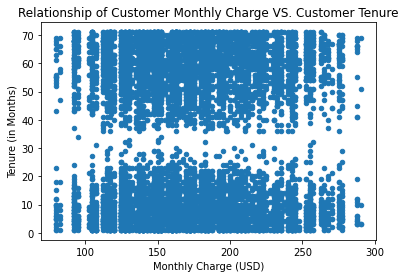

In [83]:
#Bivariate with Tenure
churn.plot(kind='scatter', x='MonthlyCharge', y='Tenure')
plt.xlabel('Monthly Charge (USD)')
plt.ylabel('Tenure (in Months)')
plt.title('Relationship of Customer Monthly Charge VS. Customer Tenure')

Monthly charge has a bell curve distribution that is slightly skewed to the right. There does not appear to be an observable relationship between MonthlyCharge and Tenure.

##### Bandwidth_GB_Year

Text(0.5, 1.0, 'Yearly Bandwidth Usage')

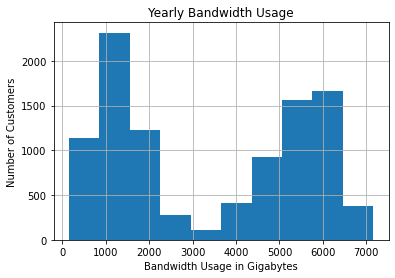

In [84]:
#Univariate
churn.hist('Bandwidth_GB_Year')
plt.xlabel('Bandwidth Usage in Gigabytes')
plt.ylabel('Number of Customers')
plt.title('Yearly Bandwidth Usage')

Text(0.5, 1.0, 'Relationship of Customer Bandwidth Usage VS. Customer Tenure')

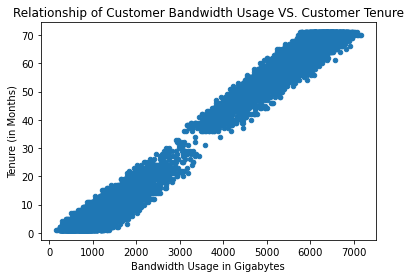

In [85]:
#Bivariate with Tenure
churn.plot(kind='scatter', x='Bandwidth_GB_Year', y='Tenure')
plt.xlabel('Bandwidth Usage in Gigabytes')
plt.ylabel('Tenure (in Months)')
plt.title('Relationship of Customer Bandwidth Usage VS. Customer Tenure')

Bandwidth usage has a bimodal distribution. It appears to be closely correlated with Tenure.

##### Contract

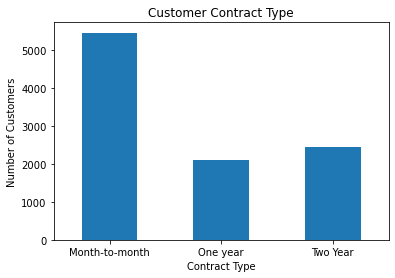

In [86]:
#Univariate
churn.groupby('Contract').size().plot.bar(rot=0)
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.title('Customer Contract Type')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Contract Type vs Customer Tenure')

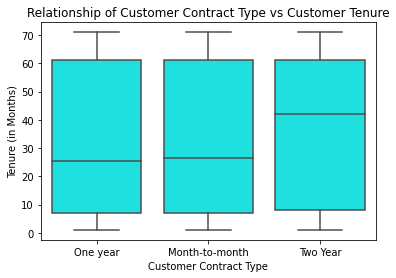

In [87]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="Contract", y='Tenure', color="cyan")
plt.xlabel("Customer Contract Type")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Contract Type vs Customer Tenure")

Month-to-month contracts are most popular with customers, but customers with two-year contracts have the longest tenure.

##### Techie

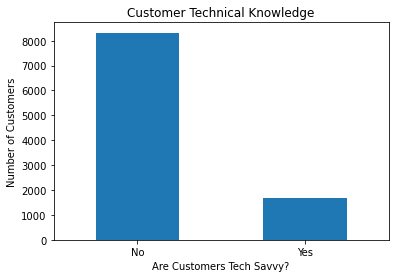

In [88]:
#Univariate
churn.groupby('Techie').size().plot.bar(rot=0)
plt.xlabel('Are Customers Tech Savvy?')
plt.ylabel('Number of Customers')
plt.title('Customer Technical Knowledge')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Technical Knowledge vs Customer Tenure')

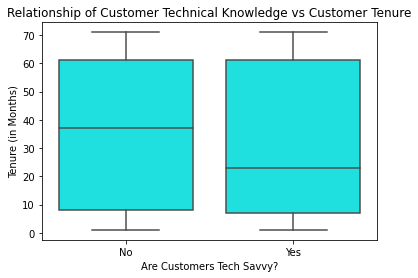

In [89]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="Techie", y='Tenure', color="cyan")
plt.xlabel("Are Customers Tech Savvy?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Technical Knowledge vs Customer Tenure")

Most customers do not consider themselves tech savvy. Non tech savvy customers have longer tenure than tech savvy customers.

##### InternetService

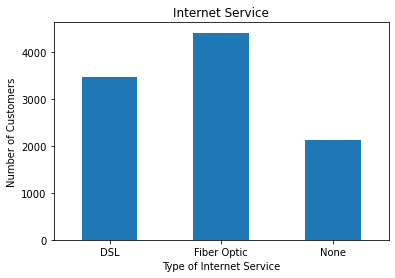

In [90]:
#Univariate
churn.groupby('InternetService').size().plot.bar(rot=0)
plt.xlabel('Type of Internet Service')
plt.ylabel('Number of Customers')
plt.title('Internet Service')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Internet Service Type vs Customer Tenure')

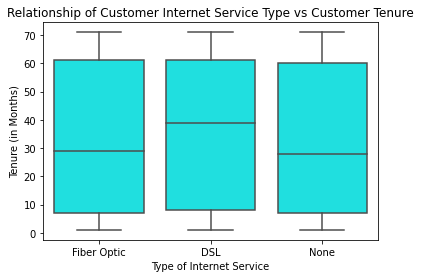

In [91]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="InternetService", y='Tenure', color="cyan")
plt.xlabel("Type of Internet Service")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Internet Service Type vs Customer Tenure")

Fiber optic internet is the most popular internet option among customers, but customers with DSL have longer tenure compared with other internet types. 

##### Tablet

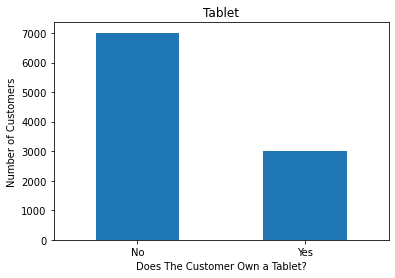

In [92]:
#Univariate
churn.groupby('Tablet').size().plot.bar(rot=0)
plt.xlabel('Does The Customer Own a Tablet?')
plt.ylabel('Number of Customers')
plt.title('Tablet')
plt.show()

Text(0.5, 1.0, 'Relationship of Tablet Ownership vs Customer Tenure')

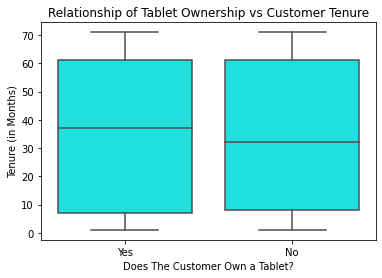

In [93]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="Tablet", y='Tenure', color="cyan")
plt.xlabel("Does The Customer Own a Tablet?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Tablet Ownership vs Customer Tenure")

Most customers do not own tablets. Customers without a tablet have longer tenure than customers who own a tablet.

##### Port_modem

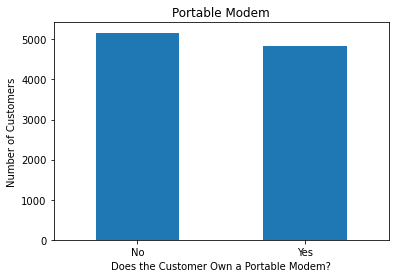

In [94]:
#Univariate
churn.groupby('Port_modem').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Own a Portable Modem?')
plt.ylabel('Number of Customers')
plt.title('Portable Modem')
plt.show()

Text(0.5, 1.0, 'Relationship of Portable Modem Ownership vs Customer Tenure')

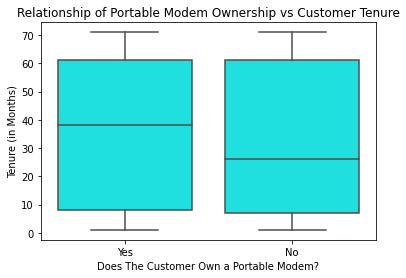

In [95]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="Port_modem", y='Tenure', color="cyan")
plt.xlabel("Does The Customer Own a Portable Modem?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Portable Modem Ownership vs Customer Tenure")

Portable modem ownership is evenly split among customers. Customers who own a portable modem have longer tenure than those who do not own a portable modem. 

##### Phone

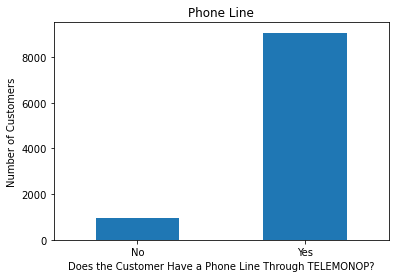

In [96]:
#Univariate
churn.groupby('Phone').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have a Phone Line Through TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Phone Line')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Phone Line vs Customer Tenure')

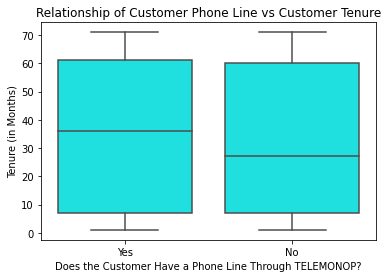

In [97]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="Phone", y='Tenure', color="cyan")
plt.xlabel("Does the Customer Have a Phone Line Through TELEMONOP?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Phone Line vs Customer Tenure")

The majority of customers have a phone line through TELEMONOP. Customers with phone lines have longer tenure than those that do not have phone service.

##### Multiple

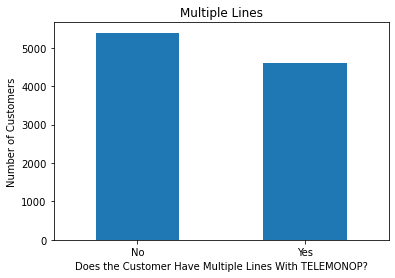

In [98]:
#Univariate
churn.groupby('Multiple').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have Multiple Lines With TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Multiple Lines')
plt.show()

Text(0.5, 1.0, 'Relationship of Multiple Phone Lines vs Customer Tenure')

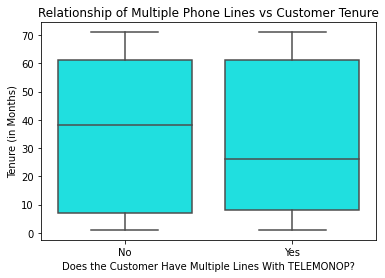

In [99]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="Multiple", y='Tenure', color="cyan")
plt.xlabel("Does the Customer Have Multiple Lines With TELEMONOP?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Multiple Phone Lines vs Customer Tenure")

More customers do not have multiple lines compared to customers that do have multiple lines. Customers without multiple lines have longer tenure. 

##### OnlineSecurity

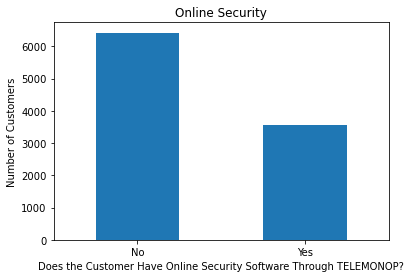

In [100]:
#Univariate
churn.groupby('OnlineSecurity').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have Online Security Software Through TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Online Security')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Online Security Software vs Customer Tenure')

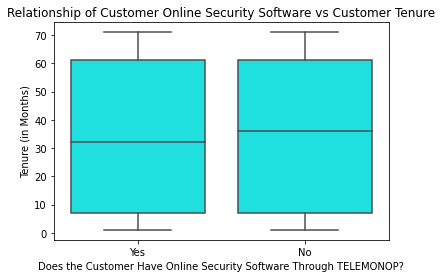

In [101]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="OnlineSecurity", y='Tenure', color="cyan")
plt.xlabel("Does the Customer Have Online Security Software Through TELEMONOP?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Online Security Software vs Customer Tenure")

The majority of customers do not have online security. Customers without online security have slightly longer tenure. 

##### OnlineBackup

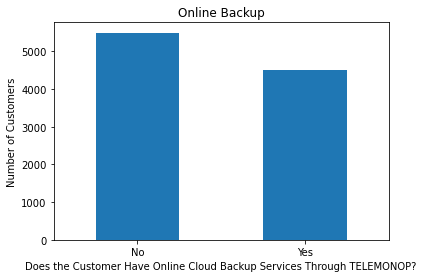

In [102]:
#Univariate
churn.groupby('OnlineBackup').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have Online Cloud Backup Services Through TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Online Backup')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Online Backup Services vs Customer Tenure')

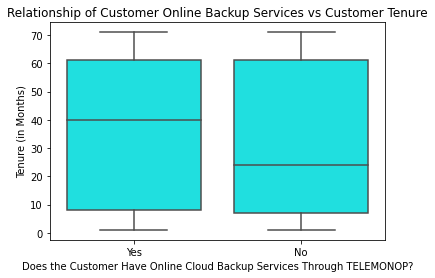

In [103]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="OnlineBackup", y='Tenure', color="cyan")
plt.xlabel("Does the Customer Have Online Cloud Backup Services Through TELEMONOP?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Online Backup Services vs Customer Tenure")

The majority of customers do not have online backup. The customers that do have online backup have longer tenure. 

##### DeviceProtection

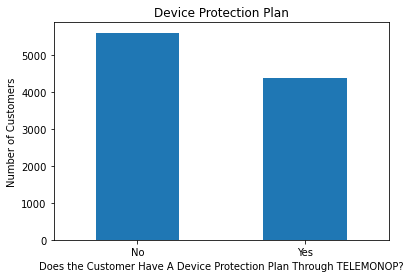

In [104]:
#Univariate
churn.groupby('DeviceProtection').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have A Device Protection Plan Through TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Device Protection Plan')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Device Protection Plans vs Customer Tenure')

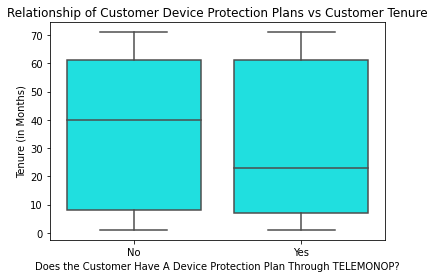

In [105]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="DeviceProtection", y='Tenure', color="cyan")
plt.xlabel("Does the Customer Have A Device Protection Plan Through TELEMONOP?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Device Protection Plans vs Customer Tenure")

The majority of customers do not have a device protection plan. Customers without a device protection plan have longer tenure.

##### TechSupport

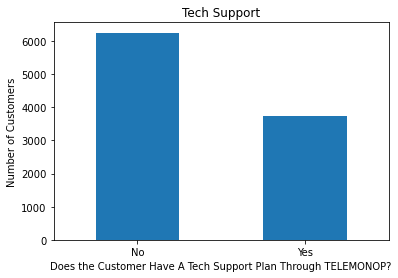

In [106]:
#Univariate
churn.groupby('TechSupport').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Have A Tech Support Plan Through TELEMONOP?')
plt.ylabel('Number of Customers')
plt.title('Tech Support')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Tech Support Plans vs Customer Tenure')

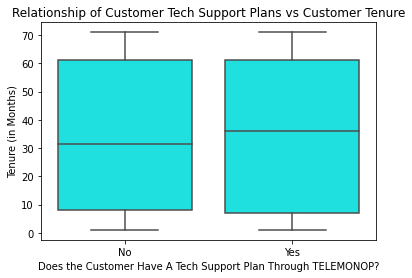

In [107]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="TechSupport", y='Tenure', color="cyan")
plt.xlabel("Does the Customer Have A Tech Support Plan Through TELEMONOP?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Tech Support Plans vs Customer Tenure")

The majority of customers do not have a tech support plan. Tech support plans does not appear to be correlated with tenure. 

##### StreamingTV

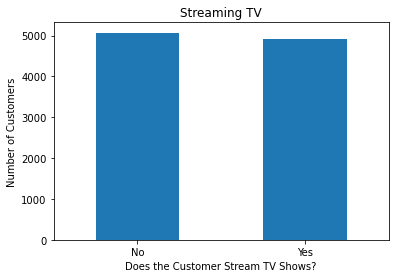

In [108]:
#Univariate
churn.groupby('StreamingTV').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Stream TV Shows?')
plt.ylabel('Number of Customers')
plt.title('Streaming TV')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer TV Streaming vs Customer Tenure')

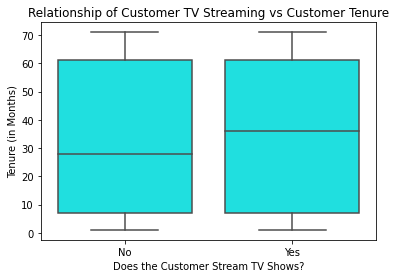

In [109]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="StreamingTV", y='Tenure', color="cyan")
plt.xlabel("Does the Customer Stream TV Shows?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer TV Streaming vs Customer Tenure")

Customers are split as to whether or not they stream TV shows. Those that do have longer tenure. 

##### StreamingMovies

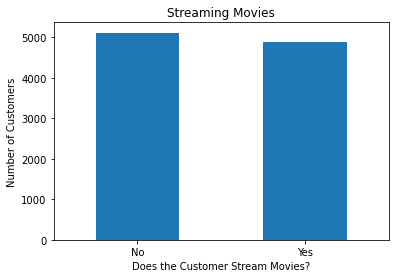

In [111]:
#Univariate
churn.groupby('StreamingMovies').size().plot.bar(rot=0)
plt.xlabel('Does the Customer Stream Movies?')
plt.ylabel('Number of Customers')
plt.title('Streaming Movies')
plt.show()

Text(0.5, 1.0, 'Relationship of Customer Movie Streaming vs Customer Tenure')

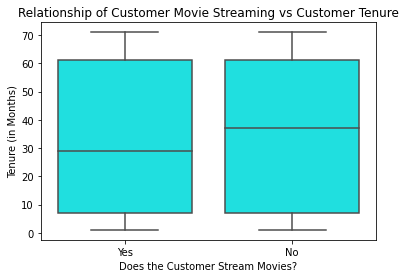

In [112]:
#Bivariate with Tenure
sns.boxplot(data=churn, x="StreamingMovies", y='Tenure', color="cyan")
plt.xlabel("Does the Customer Stream Movies?")
plt.ylabel("Tenure (in Months)")
plt.title("Relationship of Customer Movie Streaming vs Customer Tenure")

Customers are split as to whether or not they stream movies. Those that don’t stream movies have longer tenure.

# Data Wrangling

### C3: Data Wrangling Steps and Code

After the data was cleaned and explored, I wrangled the data by dropping unneeded columns, used ordinal encoding to re-express categorical columns with binary “yes/no” data values, and re-expressed nominal categorical values with one hot encoding. After renaming the new columns created through one-hot encoding, I finally joined the new columns created into the churn data set. I then created a new data frame containing the columns that were used in the regression model. The variables in the new data frame were assessed for multicollinearity and correlated variables were dropped from the new data set. The code for data wrangling activities is in cells 113 – 165 of this notebook.

First, I dropped the City, State, TimeZone, County, and Job columns from the churn data set using Pandas drop column function. These nominal categorical data columns contain copious amounts of unique features that would drastically increase the dimensionality of the data set and could throw off the regression model. 

#### Dropping Columns

In [113]:
#Dropping unnecessary columns that would increase dimensionality of data
churn=churn.drop(columns=['City',
                               'State',
                               'County',
                               'TimeZone',
                               'Job',
                         'CaseOrder',
                         'Customer_id',
                         'Interaction',
                         'UID',
                         'Zip',
                         'Lat',
                         'Lng'])


Next, I used ordinal encoding to re-express the ordinal categorical data columns with Yes or No data values. Ordinal data includes categorical data that has an inherent order. Examples include grading scales, military ranks, and education levels (Beacom, 2019). Ordinal encoding assigns a number to each rank. For example, to use ordinal encoding on education levels, primary school would be assigned a 1, middle school would be assigned a 2, high school would be assigned a 3, and college would be assigned a 4. Ordinal encoding can also be used on “Yes/No” or “True/False” data. 

I used Python’s replace function to replace Yes values with 1 and no values with zero in the Churn, Techie, Port_Modem, Tablet, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, and PaperlessBilling columns. I included these variables in the regression model because they contain data about services TELEMONOP offers. If one of these services are correlated with longer tenure, TELEMONOP can offer promotions for them in their upcoming marketing campaign.

In [114]:
##### Ordinal Encoding "Yes/No" Binary Variables 

In [115]:
churn.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

In [116]:
churn.Techie.replace(('Yes', 'No'), (1, 0), inplace=True)

In [117]:
churn.Port_modem.replace(('Yes', 'No'), (1, 0), inplace=True)

In [118]:
churn.Tablet.replace(('Yes', 'No'), (1, 0), inplace=True)

In [119]:
churn.Phone.replace(('Yes', 'No'), (1, 0), inplace=True)

In [120]:
churn.Multiple.replace(('Yes', 'No'), (1, 0), inplace=True)

In [121]:
churn.OnlineSecurity.replace(('Yes', 'No'), (1, 0), inplace=True)

In [122]:
churn.OnlineBackup.replace(('Yes', 'No'), (1, 0), inplace=True)

In [123]:
churn.DeviceProtection.replace(('Yes', 'No'), (1, 0), inplace=True)

In [124]:
churn.TechSupport.replace(('Yes', 'No'), (1, 0), inplace=True)

In [125]:
churn.StreamingTV.replace(('Yes', 'No'), (1, 0), inplace=True)

In [126]:
churn.StreamingMovies.replace(('Yes', 'No'), (1, 0), inplace=True)

In [127]:
churn.PaperlessBilling.replace(('Yes', 'No'), (1, 0), inplace=True)

In [128]:
print(churn)

      Population      Area  Children  Age  Income        Marital  Gender  \
0             38     Urban         0   68   28561        Widowed    Male   
1          10446     Urban         1   27   21704        Married  Female   
2           3735     Urban         4   50    9609        Widowed  Female   
3          13863  Suburban         1   48   18925        Married    Male   
4          11352  Suburban         0   83   40074      Separated    Male   
...          ...       ...       ...  ...     ...            ...     ...   
9995         640     Rural         3   23   55723        Married    Male   
9996       77168     Rural         4   48   34129       Divorced    Male   
9997         406     Rural         1   48   45983  Never Married  Female   
9998       35575     Urban         1   39   16667      Separated    Male   
9999       12230     Urban         1   28    9020  Never Married    Male   

      Churn  Outage_sec_perweek  Email  Contacts  Yearly_equip_failure  \
0         0  

#### One-Hot Encoding Columns With Nominal Data and Renaming The Resulting Columns

Categorical values with nominal data can be converted to numeric data that can be utilized in regression models through one-hot encoding. Nominal categorical data includes data with category names, but no inherent order (Beacom, 2019). Examples include gender, marital status, color, or city names. I chose to use one-hot encoding because it creates a new column for each feature within the original categorical column and assigns either a one or a zero depending on if that feature was present in a specific row of data. One of the feature columns is dropped before running the multiple linear regression model to reduce multicollinearity. The user is still able to determine if the dropped feature applies to the row if all other feature columns contain zeros.

Let’s say the Area column was re-expressed to numeric data. Feature columns would be created for urban area and suburban area, and rural area. The urban column is dropped. If the user is viewing a row of data that represents a customer who lives in an urban area, they would see zeros in the SuburbanArea and RuralArea columns. This communicates the customer lived in an urban area. 

One hot encoding was performed using Pandas’ get dummies function. This function creates a new data frame with individual columns for each feature from the original column in the churn dataset. It also assigns ones and zeros based on the data from the column in the original churn data set.

After creating the new data frame, I renamed the columns to remove spaces and to provide clarity to column names as necessary with pandas renaming function. For example, the “Credit Card” column in the new data frame created from the PaymentMethod column in the original churn data set was renamed to “PaymentCreditCard” to show that Credit Card was referring to the payment method. Finally, I joined the newly created and renamed feature columns from the temporary data frames to the churn data set using pandas concat join tool.

In [129]:
#Generating columns of dummy values for Churn's Gender column and renaming the new columns
gender_tempdf = pd.get_dummies(data=churn["Gender"], drop_first=True)

In [130]:
gender_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Male       10000 non-null  uint8
 1   Nonbinary  10000 non-null  uint8
dtypes: uint8(2)
memory usage: 19.7 KB


In [131]:
#renaming the dummy Gender columns for clarity and to remove any spaces
gender_tempdf = gender_tempdf.rename(columns={'Male': 'GenderMale', 'Nonbinary' : 'GenderNonbinary'})
gender_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   GenderMale       10000 non-null  uint8
 1   GenderNonbinary  10000 non-null  uint8
dtypes: uint8(2)
memory usage: 19.7 KB


In [132]:
#Generating columns of dummy values for Churn's Marital column
marital_tempdf = pd.get_dummies(data=churn["Marital"], drop_first=True)

In [133]:
#renaming the dummy Marital columns for clarity and to remove any spaces
marital_tempdf = marital_tempdf.rename(columns={'Never Married': 'NeverMarried'})
marital_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Married       10000 non-null  uint8
 1   NeverMarried  10000 non-null  uint8
 2   Separated     10000 non-null  uint8
 3   Widowed       10000 non-null  uint8
dtypes: uint8(4)
memory usage: 39.2 KB


In [134]:
#Generating columns of dummy values for Churn's Area column
area_tempdf = pd.get_dummies(data=churn["Area"], drop_first=True)

In [135]:
#renaming the dummy Area columns for clarity and to remove any spaces
area_tempdf = area_tempdf.rename(columns={'Suburban': 'AreaSuburban', 'Urban': 'AreaUrban'})
area_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   AreaSuburban  10000 non-null  uint8
 1   AreaUrban     10000 non-null  uint8
dtypes: uint8(2)
memory usage: 19.7 KB


In [136]:
#Generating columns of dummy values for churn's PaymentMethod column
paymentmethod_tempdf = pd.get_dummies(data=churn["PaymentMethod"], drop_first=True)

In [137]:
#renaming the dummy PaymentMethod columns for clarity and to remove any spaces
paymentmethod_tempdf = paymentmethod_tempdf.rename(columns={'Credit Card (automatic)': 'PaymentCreditCard', 
                                                            'Electronic Check': 'PaymentElectronicCheck', 
                                                            'Mailed Check': 'PaymentMailedCheck'})
paymentmethod_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   PaymentCreditCard       10000 non-null  uint8
 1   PaymentElectronicCheck  10000 non-null  uint8
 2   PaymentMailedCheck      10000 non-null  uint8
dtypes: uint8(3)
memory usage: 29.4 KB


In [138]:
#Generating columns of dummy values for churn's Contract column
contract_tempdf = pd.get_dummies(data=churn["Contract"], drop_first=True)

In [139]:
#renaming the dummy Contract columns for clarity and to remove any spaces
contract_tempdf = contract_tempdf.rename(columns={'One year': 'ContractOneYear', 'Two Year': 'ContractTwoYear'})
contract_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ContractOneYear  10000 non-null  uint8
 1   ContractTwoYear  10000 non-null  uint8
dtypes: uint8(2)
memory usage: 19.7 KB


In [140]:
#Generating columns of dummy values for churn's InternetService column
internetservice_tempdf = pd.get_dummies(data=churn["InternetService"], drop_first=True)

In [141]:
#Renaming dummy InternetService columns for clarity and to remove spaces
internetservice_tempdf = internetservice_tempdf.rename(columns={'Fiber Optic': 'InternetFiberOptic', 'None': 'InternetNone'})
internetservice_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   InternetFiberOptic  10000 non-null  uint8
 1   InternetNone        10000 non-null  uint8
dtypes: uint8(2)
memory usage: 19.7 KB


In [142]:
 #Generating columns of dummy values for churn's PaymentMethod column
paymentmethod_tempdf = pd.get_dummies(data=churn["PaymentMethod"], drop_first=True)

In [143]:
#Renaming dummy PaymentMethod columns for clarity and to remove spaces
paymentmethod_tempdf = paymentmethod_tempdf.rename(columns={'Credit Card (automatic)': 'PaymentCreditCard', 'Electronic Check': 'PaymentElectronicCheck', 'Mailed Check' : 'PaymentMailedCheck'})
paymentmethod_tempdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   PaymentCreditCard       10000 non-null  uint8
 1   PaymentElectronicCheck  10000 non-null  uint8
 2   PaymentMailedCheck      10000 non-null  uint8
dtypes: uint8(3)
memory usage: 29.4 KB


### Joining Dummy Dataframe Columns With churn Dataset

###### Joining dummy columns for Area (AreaSuburban, AreaUrban)

In [144]:
#Joining AreaSuburban
AreaSuburban = area_tempdf["AreaSuburban"]
churn = pd.concat([churn,AreaSuburban], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0


In [145]:
#Joining AreaUrban
AreaUrban = area_tempdf["AreaUrban"]
churn = pd.concat([churn,AreaUrban], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1


###### Joining dummy columns for Marital (Married, NeverMarried, Separated, Widowed)

In [146]:
#Joining Married
Married = marital_tempdf["Married"]
churn = pd.concat([churn,Married], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0


In [147]:
#Joining NeverMarried
NeverMarried = marital_tempdf["NeverMarried"]
churn = pd.concat([churn,NeverMarried], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0


In [148]:
#Joining Separated
Separated = marital_tempdf["Separated"]
churn = pd.concat([churn,Separated], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1


In [149]:
#Joining Widowed
Widowed = marital_tempdf["Widowed"]
churn = pd.concat([churn,Widowed], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0


###### Joining dummy columns for Gender (GenderMale, GenderNonbinary)

In [150]:
#Joining GenderMale
GenderMale = gender_tempdf["GenderMale"]
churn = pd.concat([churn, GenderMale], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1


In [151]:
#Joining GenderNonbinary
GenderNonbinary = gender_tempdf["GenderNonbinary"]
churn = pd.concat([churn, GenderNonbinary], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0


###### Joining dummy columns for Contract (ContractOneYear, ContractTwoYear)

In [152]:
#Joining ContractOneYear
ContractOneYear  = contract_tempdf["ContractOneYear"]
churn = pd.concat([churn, ContractOneYear], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0


In [153]:
#Joining ContractTwoYear
ContractTwoYear  = contract_tempdf["ContractTwoYear"]
churn = pd.concat([churn, ContractTwoYear], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1


###### Joining dummy columns for InternetService (InternetFiber, InternetNone)

In [154]:
#Joining InternetFiberOptic
InternetFiberOptic = internetservice_tempdf["InternetFiberOptic"]
churn = pd.concat([churn, InternetFiberOptic], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear,InternetFiberOptic
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0,1
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0,1
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1,1
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1,1


In [155]:
#Joining InternetNone
InternetNone = internetservice_tempdf["InternetNone"]
churn = pd.concat([churn, InternetNone], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear,InternetFiberOptic,InternetNone
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0,1,0
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0,1,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0,0
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0,0,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1,1,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1,1,0


###### Joining dummy columns for PaymentMethod (PaymentCreditCard, PaymentElectronicCheck, PaymentMailedCheck)

In [156]:
#Joining PaymentCreditCard
PaymentCreditCard = paymentmethod_tempdf["PaymentCreditCard"]
churn = pd.concat([churn, PaymentCreditCard], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear,InternetFiberOptic,InternetNone,PaymentCreditCard
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0,1,0,1
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0,1,0,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0,0,1
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0,0,0
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0,0,0,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1,1,0,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1,0,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1,1,0,1


In [157]:
#Joining PaymentElectronicCheck
PaymentElectronicCheck = paymentmethod_tempdf["PaymentElectronicCheck"]
churn = pd.concat([churn, PaymentElectronicCheck], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear,InternetFiberOptic,InternetNone,PaymentCreditCard,PaymentElectronicCheck
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0,1,0,1,0
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0,1,0,0,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0,0,1,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0,0,0,0
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1,1,0,0,1
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1,1,0,1,0


In [158]:
#Joining PaymentMailedCheck
PaymentMailedCheck = paymentmethod_tempdf["PaymentMailedCheck"]
churn = pd.concat([churn, PaymentMailedCheck], axis = 1)
churn

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Response,Fix,Replacement,Reliability,Options,Respectfulness,Courteous,Listen,AreaSuburban,AreaUrban,Married,NeverMarried,Separated,Widowed,GenderMale,GenderNonbinary,ContractOneYear,ContractTwoYear,InternetFiberOptic,InternetNone,PaymentCreditCard,PaymentElectronicCheck,PaymentMailedCheck
0,38,Urban,0,68,28561,Widowed,Male,0,7,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6,172.46,904,5,5,5,3,4,4,3,4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
1,10446,Urban,1,27,21704,Married,Female,1,11,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1,242.63,800,3,4,3,3,4,3,4,4,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,3735,Urban,4,50,9609,Widowed,Female,0,10,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15,159.95,2054,4,4,2,4,4,3,3,3,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
3,13863,Suburban,1,48,18925,Married,Male,0,14,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17,119.96,2164,4,4,4,2,5,4,3,3,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,11352,Suburban,0,83,40074,Separated,Male,1,8,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1,149.95,271,4,4,4,3,4,4,4,5,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,640,Rural,3,23,55723,Married,Male,0,9,12,2,0,0,Month-to-month,1,1,DSL,1,1,0,1,1,0,0,0,0,Electronic Check,68,159.98,6511,3,2,3,3,4,3,2,3,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
9996,77168,Rural,4,48,34129,Divorced,Male,0,6,15,2,0,0,Two Year,0,0,Fiber Optic,1,1,1,1,1,0,1,0,0,Electronic Check,61,207.48,5695,4,5,5,4,4,5,2,5,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0
9997,406,Rural,1,48,45983,Never Married,Female,0,6,10,0,0,0,Month-to-month,0,0,Fiber Optic,1,1,1,1,0,0,0,0,1,Bank Transfer(automatic),47,169.97,4159,4,4,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9998,35575,Urban,1,39,16667,Separated,Male,0,12,14,1,0,0,Two Year,0,1,Fiber Optic,0,1,0,0,0,1,1,1,1,Credit Card (automatic),71,252.62,6468,4,4,6,4,3,3,5,4,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [159]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Population              10000 non-null  int64  
 1   Area                    10000 non-null  object 
 2   Children                10000 non-null  int64  
 3   Age                     10000 non-null  int64  
 4   Income                  10000 non-null  int64  
 5   Marital                 10000 non-null  object 
 6   Gender                  10000 non-null  object 
 7   Churn                   10000 non-null  int64  
 8   Outage_sec_perweek      10000 non-null  int64  
 9   Email                   10000 non-null  int64  
 10  Contacts                10000 non-null  int64  
 11  Yearly_equip_failure    10000 non-null  int64  
 12  Techie                  10000 non-null  int64  
 13  Contract                10000 non-null  object 
 14  Port_modem              10000 non-null 

#### Creating Seperate Multiple Linear Regression Dataframe

With the categorical values re-expressed and the new columns joined into the original churn data frame, I decided to create a new data frame that only contained the columns I would need to perform the multiple linear regression. I named the new data frame “mlr_churn.” 


Tenure was included in the new data frame as it was the target variable. Age, Children, Income, along with the Area, Gender, and Marital dummy variables were included because they represent customer demographic data that may be related to Tenure. The marketing department can create targeted ads if a certain demographic is strongly correlated with longer tenure. Techie, InternetService, Port_modem, Tablet, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies were included because they all represent services TELEMONOP offers. If a service is highly correlated with longer tenure, TELMONOP can run promotions to entice customers to sign up for those services. I also included the Contract and Bandwidth_GB_Year variables. If a certain contract or bandwidth usage is associated with tenure, TELEMONOP can offer customers incentives for choosing a certain contract type or increasing or decreasing their bandwidth usage.


In addition to the columns I dropped earlier, I decided not to include Population since Area already provided a demographic for customer location. Outage_sec_perweek, Yearly_equip_failure, Email, Contacts, Churn, PaymentMethod, and the survey response columns were not included because they did not contain data about customer demographics or services offered by TELEMONOP.

In [160]:
# Create Multiple Linear Regression dataframe with Tenure and independent variables with dummy variables
mlr_churn = churn[["Tenure",
                   "Age",
                   "Children",
                   "Income",
                   "Married",
                   "NeverMarried",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "MonthlyCharge",
                   "Bandwidth_GB_Year",
                   "ContractOneYear",
                   "ContractTwoYear",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone",
                   "Port_modem", 
                   "Tablet", 
                   "Phone", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]

In [161]:
mlr_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tenure              10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Children            10000 non-null  int64  
 3   Income              10000 non-null  int64  
 4   Married             10000 non-null  uint8  
 5   NeverMarried        10000 non-null  uint8  
 6   Separated           10000 non-null  uint8  
 7   Widowed             10000 non-null  uint8  
 8   GenderMale          10000 non-null  uint8  
 9   GenderNonbinary     10000 non-null  uint8  
 10  AreaUrban           10000 non-null  uint8  
 11  AreaSuburban        10000 non-null  uint8  
 12  MonthlyCharge       10000 non-null  float64
 13  Bandwidth_GB_Year   10000 non-null  int64  
 14  ContractOneYear     10000 non-null  uint8  
 15  ContractTwoYear     10000 non-null  uint8  
 16  Techi

In [162]:
#Creating Correlation Matrix dataframe

In [163]:
corr_churn = churn[["Age",
                   "Children",
                   "Income",
                   "Married",
                   "NeverMarried",
                   "Separated",
                   "Widowed",
                   "GenderMale",
                   "GenderNonbinary",
                   "AreaUrban",
                   "AreaSuburban",
                   "MonthlyCharge",
                   "Bandwidth_GB_Year",
                   "ContractOneYear",
                   "ContractTwoYear",
                   "Techie", 
                   "InternetFiberOptic",
                   "InternetNone",
                   "Port_modem", 
                   "Tablet", 
                   "Phone", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]

In [164]:
corr_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Children            10000 non-null  int64  
 2   Income              10000 non-null  int64  
 3   Married             10000 non-null  uint8  
 4   NeverMarried        10000 non-null  uint8  
 5   Separated           10000 non-null  uint8  
 6   Widowed             10000 non-null  uint8  
 7   GenderMale          10000 non-null  uint8  
 8   GenderNonbinary     10000 non-null  uint8  
 9   AreaUrban           10000 non-null  uint8  
 10  AreaSuburban        10000 non-null  uint8  
 11  MonthlyCharge       10000 non-null  float64
 12  Bandwidth_GB_Year   10000 non-null  int64  
 13  ContractOneYear     10000 non-null  uint8  
 14  ContractTwoYear     10000 non-null  uint8  
 15  Techie              10000 non-null  int64  
 16  Inter

In [165]:
#Received multicolinearity error when trying to create initial model. 
#creating heatmap & correlation matrix to eliminate highly correlated variables

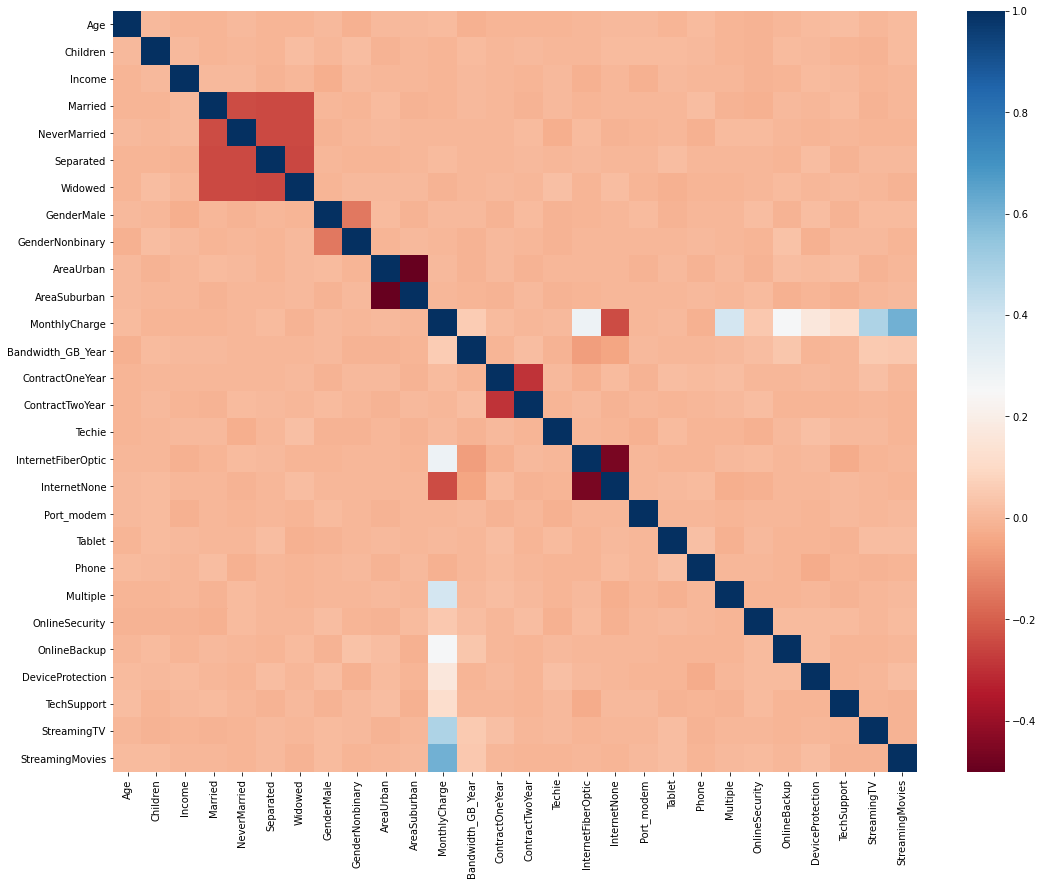

In [166]:
#heatmap
plt.figure(figsize = (18, 14))
sns.heatmap(corr_churn.corr(), annot=False, cmap='RdBu')
plt.show()

In [167]:
#correlation matrix
matrix = corr_churn.corr()
print(matrix)

                         Age  Children    Income   Married  NeverMarried  \
Age                 1.000000  0.004934 -0.004091 -0.005491      0.005879   
Children            0.004934  1.000000  0.007270 -0.006026      0.000729   
Income             -0.004091  0.007270  1.000000  0.009022      0.003758   
Married            -0.005491 -0.006026  0.009022  1.000000     -0.239680   
NeverMarried        0.005879  0.000729  0.003758 -0.239680      1.000000   
Separated          -0.006444 -0.005195 -0.010934 -0.244089     -0.247636   
Widowed            -0.005371  0.017859 -0.000360 -0.245075     -0.248636   
GenderMale          0.005332  0.001432 -0.023869  0.002252     -0.012080   
GenderNonbinary    -0.019108  0.015456  0.006300 -0.003630      0.001370   
AreaUrban           0.007641 -0.012855  0.000926  0.012529      0.006548   
AreaSuburban        0.005045  0.001721  0.002571 -0.008312     -0.001858   
MonthlyCharge       0.010729 -0.002643 -0.003015 -0.006402      0.001333   
Bandwidth_GB

I created a correlation matrix and a heat map to check my explanatory variables for multicollinearity before creating my first model. The AreaUrban, AreaSuburban, InternetNone, InternetFiberOptic, Married, NeverMarried, Separated, Widowed, ContractOneYear, and ContractTwoYear columns showed signs of correlation and were dropped from the mlr_churn data set. 

In [168]:
#Deleting AreaUrban, AreaSuburban, InternetNone, InternetFiberOptic, Married, NeverMarried, Seperated, 
##Widowed, ContractOneYear, ContractTwoYear, GenderMale, GenderNonbinary from mlr_churn dataset

mlr_churn=mlr_churn.drop(columns=["AreaUrban",
                                  "AreaSuburban", 
                                  "InternetNone", 
                                  "InternetFiberOptic", 
                                  "Married", 
                                  "NeverMarried", 
                                  "Separated",
                                  "Widowed",
                                 "ContractOneYear",
                                 "ContractTwoYear"])

In [169]:
#Checking the dataset
mlr_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure             10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Children           10000 non-null  int64  
 3   Income             10000 non-null  int64  
 4   GenderMale         10000 non-null  uint8  
 5   GenderNonbinary    10000 non-null  uint8  
 6   MonthlyCharge      10000 non-null  float64
 7   Bandwidth_GB_Year  10000 non-null  int64  
 8   Techie             10000 non-null  int64  
 9   Port_modem         10000 non-null  int64  
 10  Tablet             10000 non-null  int64  
 11  Phone              10000 non-null  int64  
 12  Multiple           10000 non-null  int64  
 13  OnlineSecurity     10000 non-null  int64  
 14  OnlineBackup       10000 non-null  int64  
 15  DeviceProtection   10000 non-null  int64  
 16  TechSupport        1000

## D1. Initial Model
I set Tenure as the target variable on the y-axis and loaded all the explanatory variables on the x-axis. The OLS report for the initial model is located below.

In [170]:
# Set dependent variable
y = mlr_churn.Tenure
# Set independent variables
X = mlr_churn[["Age",
                   "Children",
                   "Income",
                   "GenderMale",
                   "GenderNonbinary",
                   "MonthlyCharge",
                   "Bandwidth_GB_Year",
                   "Techie",
                   "Port_modem", 
                   "Tablet", 
                   "Phone", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]].assign(const=1)
model = model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 6.311e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:32   Log-Likelihood:                -23222.
No. Observations:               10000   AIC:                         4.648e+04
Df Residuals:                    9981   BIC:                         4.662e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                   0.0416      0.00

#### D2. Variable Selection Procedure and Model Evaluation Metric 

I evaluated the initial and reduced model using adjusted R-squared. Adjusted R-squared is a calculation that represents the variance for Tenure that is explained by the explanatory variables in the regression model. For example, if my model had an adjusted R-Squared value of 0.400, that would indicate that 40% of the variance found in Tenure was explained by the explanatory variables. The closer to 1.000 the score is, the better the score. Unlike r-squared, adjusted r-squared takes the total number of variables into consideration in the equation (Potters, 2023).

I chose adjusted R-squared because it accurately reflected how dependable the correlation was between Tenure and the explanatory variables. Adjusted r-squared is a more accurate display of the statistical significance and practical significance of my regression model than r-squared. For example, our visualization revealed the Tenure and Bandwidth Gigabyte Per Year might be correlated. Utilizing adjusted r-squared instead of r-squared ensured that the coefficient estimates were not artificially high. Lastly, adjusted R-squared values are an easy to interpret and compare. 

Backwards stepwise elimination was my feature selection method. It utilized P-values to determine if a variable has statistical significance in the model. P-value scores range from 0.00 to 1.0. A lower P-value indicates stronger statistical significance while a larger P-Value rating indicates little or no statistical significance. I chose to retain variables with P- Values of 0.05 or less.

Backwards Stepwise elimination is a wrapper method, meaning each grouping of variables is evaluated as one set. It is crucial to eliminate only one variable at a time and rerun the model to perform backwards stepwise elimination a second time. Dropping a variable will turn the remaining variables into a new set (Katari, 2021). I eliminated the variable with the highest P-value and lowest statistical significance each round and continued until all my variables were statistically significant with P-values of 0.05 or less.

I chose backward stepwise elimination as my feature selection method to ensure I would not delete a variable that was statistically significant. It also allowed me to witness the drastic impact removing one variable could have on the model.

### Variance Inflation Factor to Check for Multicolinearity

In [171]:
#Multicolinearity warning. Runnung VIF to check for multicolinearity

In [172]:
#All columns with a VIF of over 5.0 will be deleted, one at a time

In [173]:
X = mlr_churn[["Age",
                   "Children",
                   "Income",
                   "GenderMale",
                   "GenderNonbinary",
                   "MonthlyCharge",
                   "Bandwidth_GB_Year",
                   "Techie",
                   "Port_modem", 
                   "Tablet", 
                   "Phone", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])]
print(vif_df)

             variable        VIF
0                 Age   6.841682
1            Children   2.189941
2              Income   2.896605
3          GenderMale   1.916073
4     GenderNonbinary   1.046063
5       MonthlyCharge  60.264498
6   Bandwidth_GB_Year   3.313933
7              Techie   1.200751
8          Port_modem   1.910091
9              Tablet   1.421741
10              Phone   9.003784
11           Multiple   3.117347
12     OnlineSecurity   1.573740
13       OnlineBackup   2.444066
14   DeviceProtection   2.009460
15        TechSupport   1.771067
16        StreamingTV   4.066286
17    StreamingMovies   5.003500


In [174]:
#Deleting MonthlyCharge (VIF 60) and redoing VIF
X = mlr_churn[["Age",
                   "Children",
                   "Income",
                   "GenderMale",
                   "GenderNonbinary",
                   "Bandwidth_GB_Year",
                   "Techie",
                   "Port_modem", 
                   "Tablet", 
                   "Phone", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])]
print(vif_df)

             variable       VIF
0                 Age  5.986262
1            Children  2.153629
2              Income  2.791780
3          GenderMale  1.889696
4     GenderNonbinary  1.044809
5   Bandwidth_GB_Year  3.211520
6              Techie  1.194226
7          Port_modem  1.882516
8              Tablet  1.415373
9               Phone  7.311674
10           Multiple  1.801571
11     OnlineSecurity  1.533201
12       OnlineBackup  1.783415
13   DeviceProtection  1.742177
14        TechSupport  1.571013
15        StreamingTV  1.922151
16    StreamingMovies  1.917345


In [175]:
#Deleting Phone (VIF 7.3) and redoing VIF
X = mlr_churn[["Age",
                   "Children",
                   "Income",
                   "GenderMale",
                   "GenderNonbinary",
                   "Bandwidth_GB_Year",
                   "Techie",
                   "Port_modem", 
                   "Tablet", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])]
print(vif_df)

             variable       VIF
0                 Age  5.174540
1            Children  2.113917
2              Income  2.697340
3          GenderMale  1.860638
4     GenderNonbinary  1.042802
5   Bandwidth_GB_Year  3.102507
6              Techie  1.190211
7          Port_modem  1.855694
8              Tablet  1.401091
9            Multiple  1.773899
10     OnlineSecurity  1.520310
11       OnlineBackup  1.764891
12   DeviceProtection  1.732965
13        TechSupport  1.558305
14        StreamingTV  1.901707
15    StreamingMovies  1.896792


In [176]:
#Deleting Age (VIF 5.2) and redoing VIF
X = mlr_churn[["Children",
                   "Income",
                   "GenderMale",
                   "GenderNonbinary",
                   "Bandwidth_GB_Year",
                   "Techie",
                   "Port_modem", 
                   "Tablet", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])]
print(vif_df)

             variable       VIF
0            Children  2.054725
1              Income  2.564054
2          GenderMale  1.818306
3     GenderNonbinary  1.042081
4   Bandwidth_GB_Year  2.972448
5              Techie  1.185563
6          Port_modem  1.813495
7              Tablet  1.389298
8            Multiple  1.738522
9      OnlineSecurity  1.506451
10       OnlineBackup  1.733862
11   DeviceProtection  1.700832
12        TechSupport  1.529459
13        StreamingTV  1.864460
14    StreamingMovies  1.858483


In [177]:
#All variables have a VIF under 5.0. Multicollinearity should be solved

#### Backward Stepwise Reduction

In [178]:
#Running the model again with all high VIF variables removed to observe the P-values. Aiming for P-values 0.05 or lower

In [179]:
y = mlr_churn.Tenure
X = mlr_churn[["Children",
                   "Income",
                   "GenderMale",
                   "GenderNonbinary",
                   "Bandwidth_GB_Year",
                   "Techie",
                   "Port_modem", 
                   "Tablet", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]]
model = model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Tenure   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.698e+05
Date:                Sun, 05 May 2024   Prob (F-statistic):                        0.00
Time:                        19:46:33   Log-Likelihood:                         -24097.
No. Observations:               10000   AIC:                                  4.822e+04
Df Residuals:                    9985   BIC:                                  4.833e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [180]:
#Dropping GenderNonbinary (P-Value = 0.945) and running the model again

In [181]:
y = mlr_churn.Tenure
X = mlr_churn[["Children",
                   "Income",
                   "GenderMale",
                   "Bandwidth_GB_Year",
                   "Techie",
                   "Port_modem", 
                   "Tablet", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]].assign(const=1)
model = model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.982e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:33   Log-Likelihood:                -23968.
No. Observations:               10000   AIC:                         4.797e+04
Df Residuals:                    9985   BIC:                         4.808e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Children             -0.3078      0.01

In [182]:
# Dropping Tablet (P-Value = 0.931) and running model again

In [183]:
y = mlr_churn.Tenure
X = mlr_churn[["Children",
                   "Income",
                   "GenderMale",
                   "Bandwidth_GB_Year",
                   "Techie",
                   "Port_modem", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]].assign(const=1)
model = model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 7.520e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:33   Log-Likelihood:                -23968.
No. Observations:               10000   AIC:                         4.796e+04
Df Residuals:                    9986   BIC:                         4.807e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Children             -0.3078      0.01

In [184]:
#Dropping Techie (P-Value = 0.666) and running the model again

In [185]:
y = mlr_churn.Tenure
X = mlr_churn[["Children",
                   "Income",
                   "GenderMale",
                   "Bandwidth_GB_Year",
                   "Port_modem", 
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport", 
                   "StreamingTV",
                   "StreamingMovies"]].assign(const=1)
model = model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 8.147e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:34   Log-Likelihood:                -23969.
No. Observations:               10000   AIC:                         4.796e+04
Df Residuals:                    9987   BIC:                         4.806e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Children             -0.3078      0.01

In [186]:
#Dropping Port_modem (P-Value = 0.476) and running the model again

### D3. Reduced Multiple Regression Model

In [187]:
y = mlr_churn.Tenure
X = mlr_churn[["Children",
                   "Income",
                   "GenderMale",
                   "Bandwidth_GB_Year",
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
               "StreamingTV",
                   "StreamingMovies"]].assign(const=1)
model = model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 8.888e+04
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        19:46:34   Log-Likelihood:                -23969.
No. Observations:               10000   AIC:                         4.796e+04
Df Residuals:                    9988   BIC:                         4.805e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Children             -0.3076      0.01

In [188]:
#All P-values under 0.05. This is the final model.

### E1. Explanation of Data Analysis Process

The initial model had twenty variables and an adjusted r-square score of 0.991, meaning 99.1% of the variance found in Tenure was explained by the explanatory variables. There first model had a multicollinearity warning in the notes of the OLS report even though I checked the variables with a correlation matrix and a heatmap before creating my initial model.
Before reducing the model using backward stepwise elimination, I had to address the multicollinearity warning. I ran a variance inflation factor test using statsmodel’s variance inflation factor function. Variance inflation factor measures how correlated the explanatory variables are to each other. The variance inflation factor has a scale from one to ten, with one indicating little to no correlation and ten indicating that the variables are identical. All variables in a regression model should have a variance inflation factor of under 5.0. 

Like backward stepwise elimination, variation elimination factor is a wrapper method, an analyst removes one variable at a time before rechecking the VIF scores of the remaining variables (Katari, 2021).

Running the variance inflation factor demonstrated MonthlyCharge had a VIF score of 60. I removed MonthlyCharge from the model and reran the variance inflation factor. I ran the Variance Inflation Factor code three times total and removed Phone and Age in addition to MonthlyCharge. All the remaining variables had a VIF score of under 5.0. The multicollinearity warning was still present in the OLS Report notes after eliminating the variables with a VIF score above 5.0.

Next, I reduced the model using backwards stepwise elimination. I removed the variable with the highest P-value which was GenderNonbinary (P-value 0.945) and ran the model again. I repeated these steps, eliminating the variable with the highest P-value and rerunning the model until all P-values were under 0.05. The eliminated variables were Tablet, Techie, and Port_modem. 
The reduced model had an adjusted r-square score of 0.990, meaning 99% of the variance found in Tenure was explained by explanatory variables. Compared to 99.1% in the initial model, the initial model is technically a better fit if the only evaluation metric was adjusted r-square values. The practical significance of the 0.01% improvement is negligible. Like the first model, the reduced model had a multicollinearity warning in the notes of the OLS Report.

## E2. Output and Calculations of Model

The reduced regression model’s residual standard error is 2.660581339631767.


In [189]:
#Residual Standard Error
results.resid.std(ddof=X.shape[1])

2.6605813396317646

In [190]:
#Multicolinearity Assumption Check  - Running VIF on reduced models explanatory variables
X = mlr_churn[["Children",
                   "Income",
                   "GenderMale",
                   "Bandwidth_GB_Year",
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
               "StreamingTV",
                   "StreamingMovies"]]
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])]
print(vif_df)

             variable       VIF
0            Children  2.021719
1              Income  2.513500
2          GenderMale  1.771314
3   Bandwidth_GB_Year  2.912878
4            Multiple  1.727682
5      OnlineSecurity  1.499160
6        OnlineBackup  1.719210
7    DeviceProtection  1.689381
8         TechSupport  1.519034
9         StreamingTV  1.844373
10    StreamingMovies  1.840118


In [191]:
#Multicolinearity not detected

In [192]:
#linearity Assumption Check - Heatmap

In [193]:
#creating dataframe of reduced variables
mlr_churnFinal = mlr_churn[["Children",
                   "Income",
                   "GenderMale",
                   "Bandwidth_GB_Year",
                   "Multiple",
                   "OnlineSecurity",
                   "OnlineBackup", 
                   "DeviceProtection",
                   "TechSupport",
               "StreamingTV",
                   "StreamingMovies"]]
mlr_churnFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Children           10000 non-null  int64
 1   Income             10000 non-null  int64
 2   GenderMale         10000 non-null  uint8
 3   Bandwidth_GB_Year  10000 non-null  int64
 4   Multiple           10000 non-null  int64
 5   OnlineSecurity     10000 non-null  int64
 6   OnlineBackup       10000 non-null  int64
 7   DeviceProtection   10000 non-null  int64
 8   TechSupport        10000 non-null  int64
 9   StreamingTV        10000 non-null  int64
 10  StreamingMovies    10000 non-null  int64
dtypes: int64(10), uint8(1)
memory usage: 791.1 KB


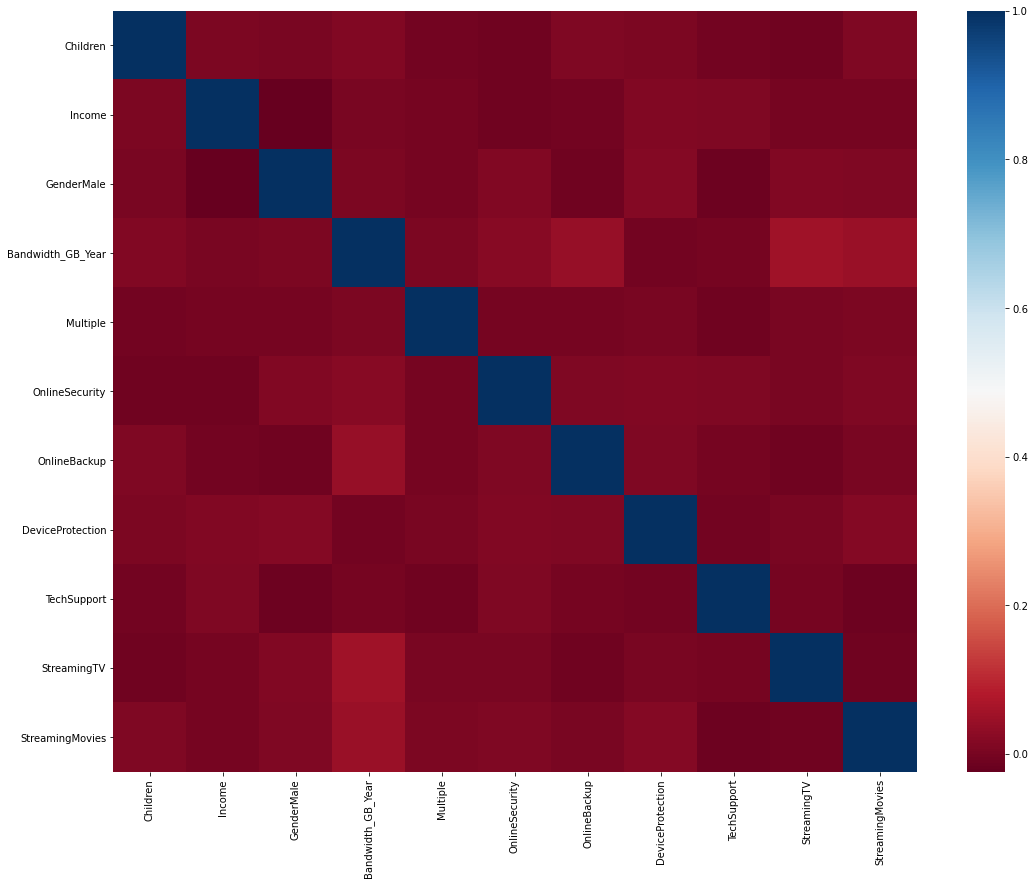

In [194]:
#heatmap
plt.figure(figsize = (18, 14))
sns.heatmap(mlr_churnFinal.corr(), annot=False, cmap='RdBu')
plt.show()

In [195]:
#Linearity assumption passed

#### Model Comparison

In [196]:
#Initial Model: adj. r squared: 0.991,  AIC: 4.649e+04  BIC: 4.664e+04

In [197]:
#Reduced Model: adj. r squared: 0.990,  AIC: 4.796e+04,  BIC: 4.805e+04 

In [198]:
#Initial Model has a better fit - higher R-squared, lower AIC and BIC

#### Residual Plots/Indepent Observation Assumption Check

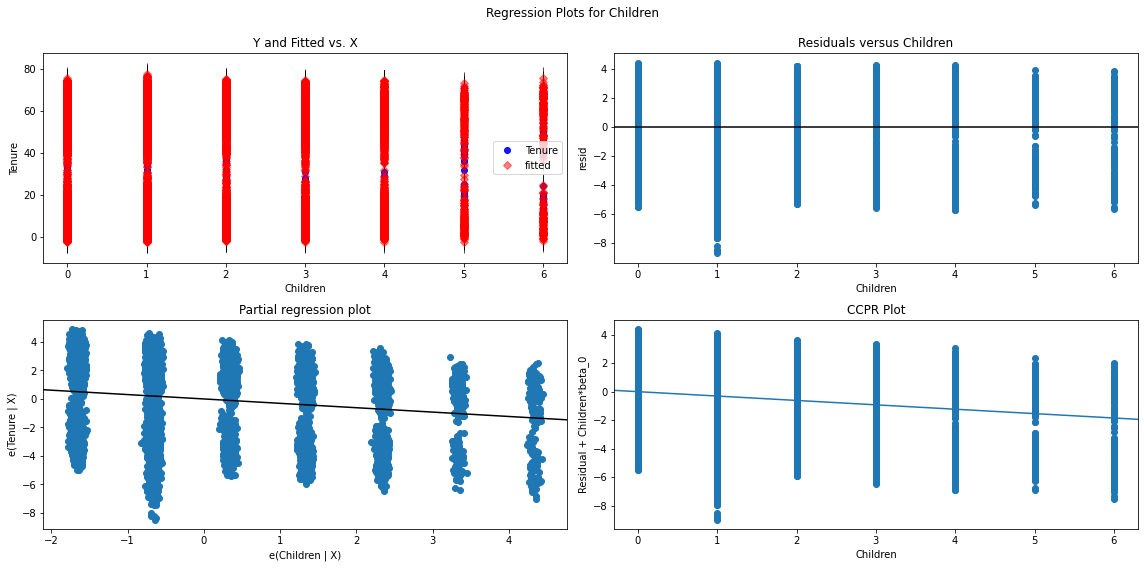

In [210]:
#Children Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Children', fig=fig);

The residual plots for children show no outliers or heteroskedasticity issues.

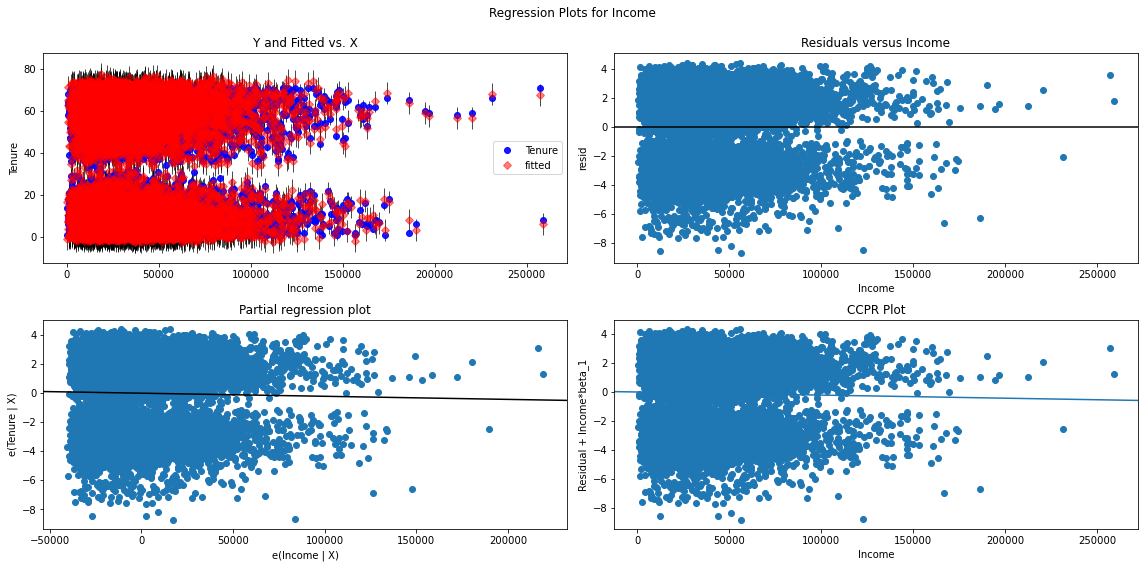

In [211]:
#Income Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Income', fig=fig);

The Residuals vs Income plot has some outliers present above the $200,000 range. There are signs of the heteroskedasticity cone shape. The plots do not appear to be evenly distributed.

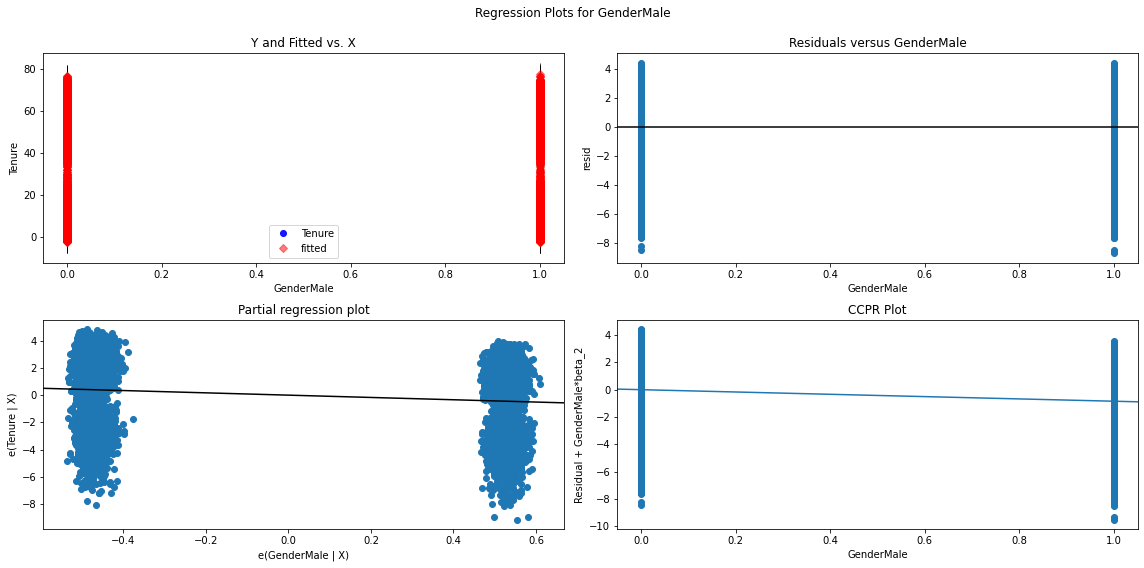

In [212]:
#GenderMale Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'GenderMale', fig=fig);

The residual plots for GenderMale show no outliers or heteroskedasticity issues.

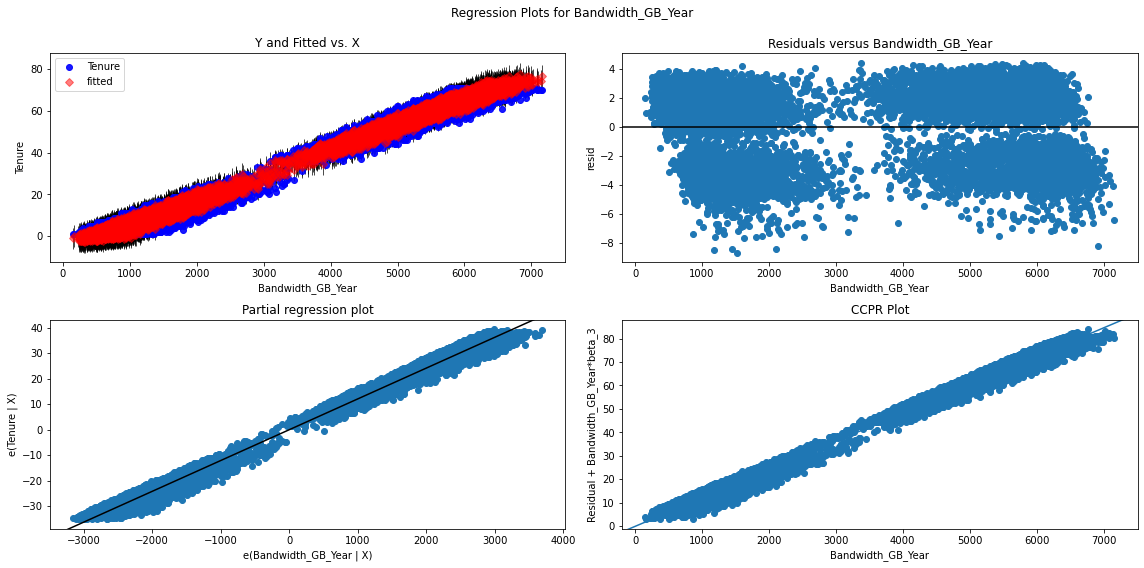

In [213]:
#Bandwidth_GB_Year Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Bandwidth_GB_Year', fig=fig);

The residuals for Bandwidth_GB_Year show no heteroskedasticity issues.

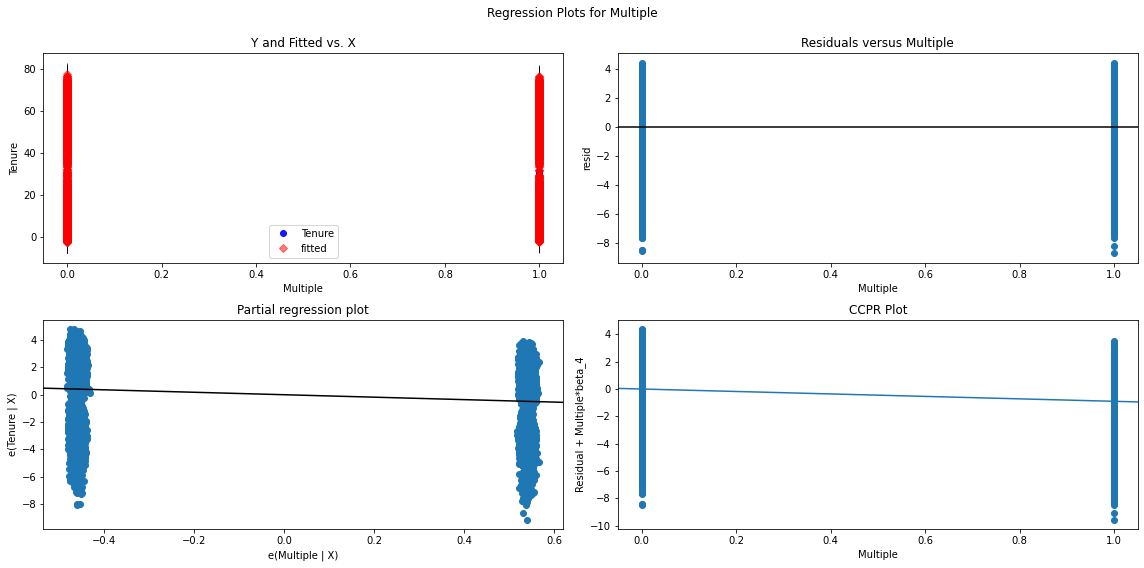

In [214]:
#Multiple Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Multiple', fig=fig);

The residuals for Multiple show no sign of outliers or heteroskedasticity issues.

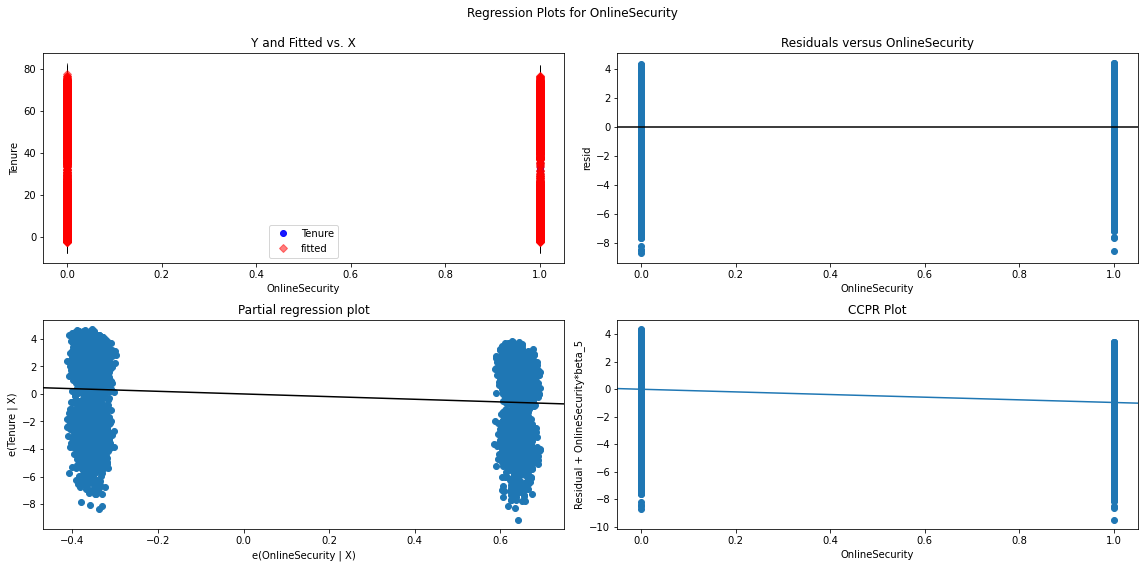

In [215]:
#OnlineSecurity Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'OnlineSecurity', fig=fig);

The residuals for OnlineSecurity show no sign of outliers or heteroskedasticity issues.

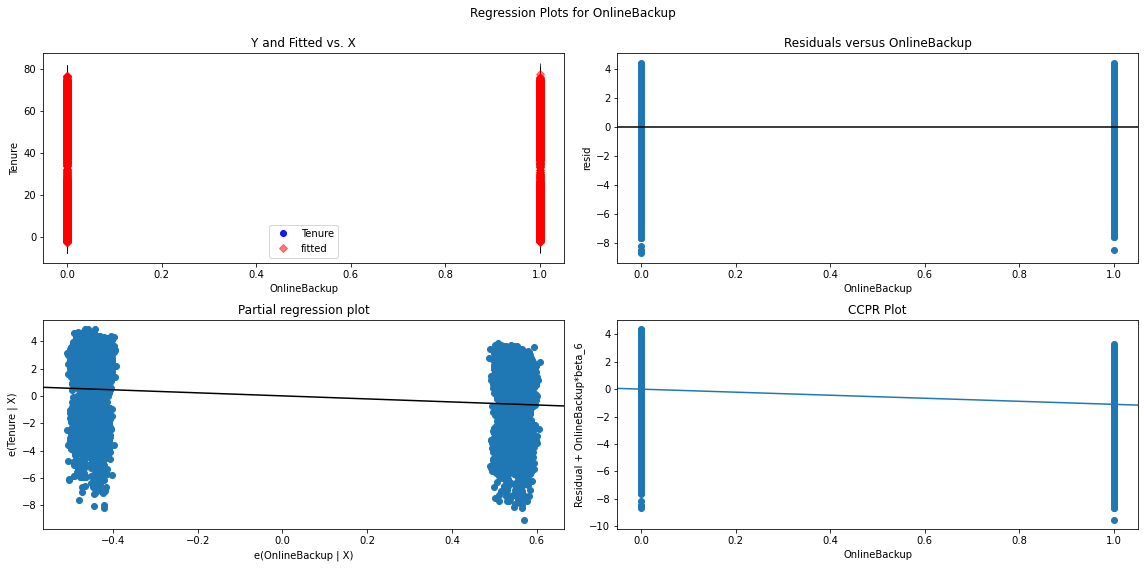

In [216]:
#Online Backup Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'OnlineBackup', fig=fig);

The residuals for OnlineBackup show no sign of outliers or heteroskedasticity issues.

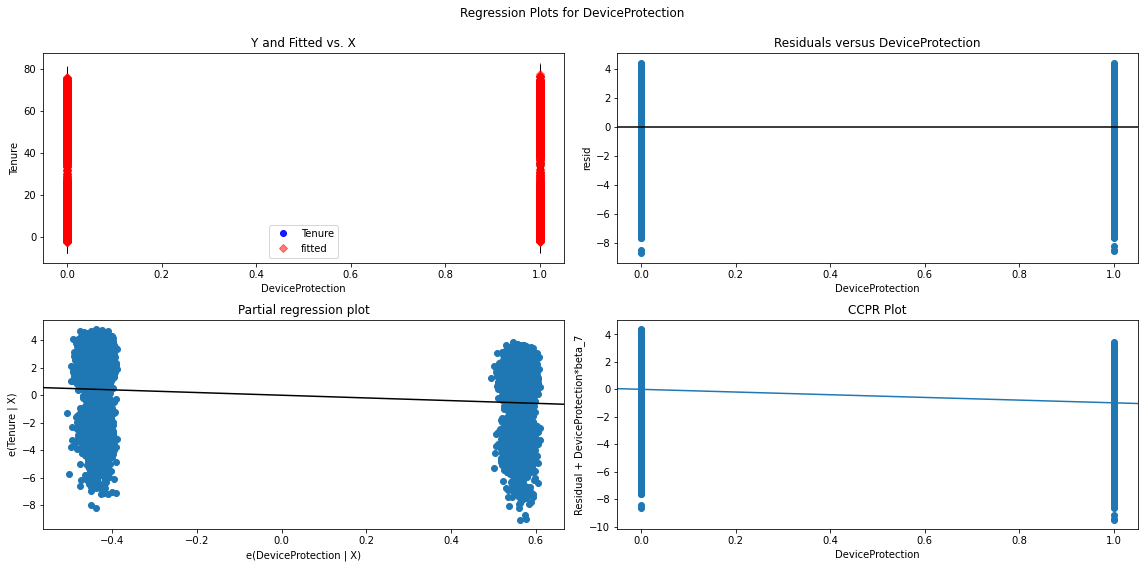

In [217]:
#DeviceProtection Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DeviceProtection', fig=fig);

The residuals for DeviceProtection show no sign of outliers or heteroskedasticity issues.

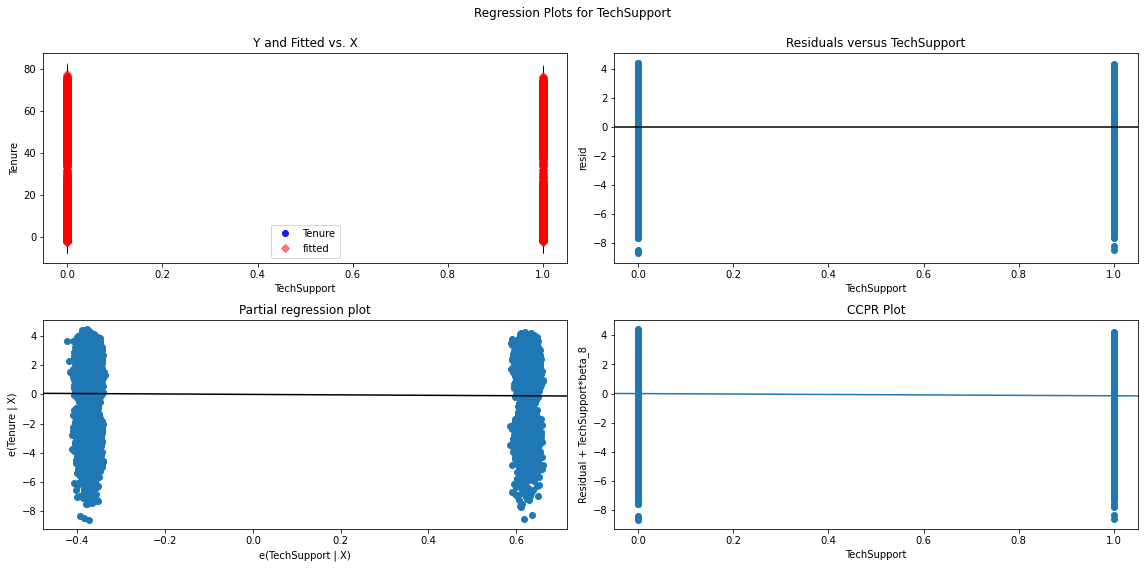

In [218]:
#TechSupport Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'TechSupport', fig=fig);

The residuals for TechSupport show no sign of outliers or heteroskedasticity issues.

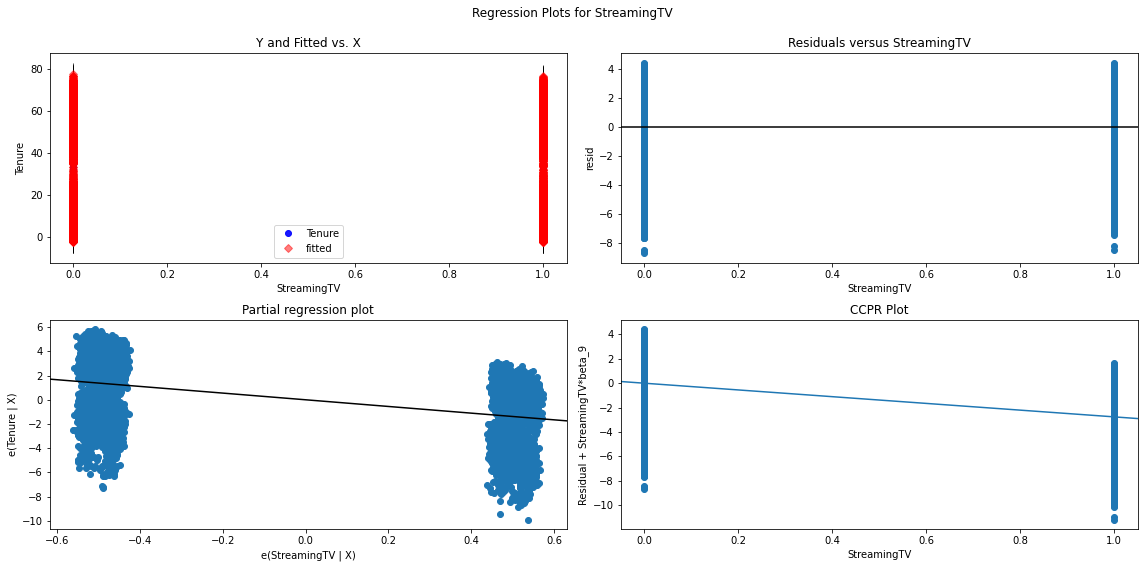

In [219]:
#StreamingTV Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'StreamingTV', fig=fig);

The residuals for StreamingTV show no sign of outliers or heteroskedasticity issues.

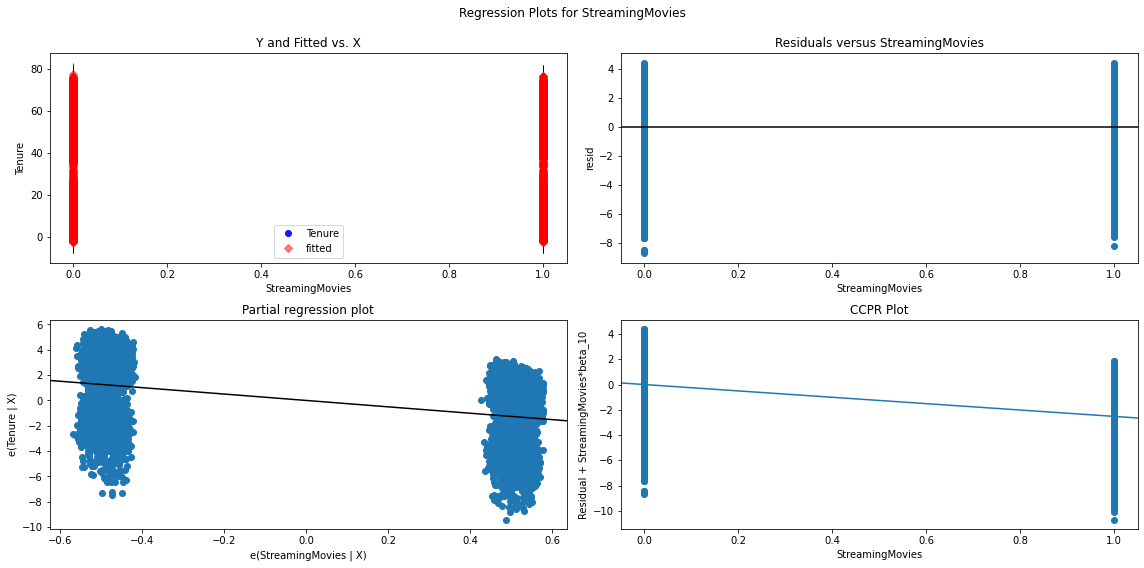

In [220]:
#StreamingMovies Residuals
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'StreamingMovies', fig=fig);

The residuals for StreamingMovies show no sign of outliers or heteroskedasticity issues.

In [221]:
#heteroscedasticity and normality issues detected in Income 
#Heteroscedasticity can cause the model to produce incorret P-values - stats unreliable
#Heteroscedasticity can cause the model to produce incorrect coefficient estimates - no practical use.

### E3. Code For Regression Models
Please see cells 171 – 200 for all code and output relating to my regression models.

### F1. Results of Analysis

Examining the coefficients on the reduced regression model yielded the following equation:

Y = -1.5926 - 2.5242(StreamingMovies) - 2.7608(StreamingTV) - 0. 531(TechSupport) - 0.9835(DeviceProtection) - 1.1103(OnlineBackup) - 0.9619(OnlineSecurity) - 0.8997(Multiple) + 0.0121(Bandwidth_GB_Year) - 0.8448(GenderMale) - 2.133e-06(Income) - 0.3076(Children)  

In practical terms, this means that:

•	Keeping all things constant, a one unit increase in StreamingMovies causes that customer’s tenure to decrease by 2.5 units.

•	Keeping all things constant, a one unit increase in StreamingTV causes that customer’s tenure to decrease by 2.76 units.

•	Keeping all things constant, a one unit increase in Tech Support causes that customer’s tenure to increase by 0.5 of a unit.

•	Keeping all things constant, a one unit increase in DeviceProtection causes that customer’s tenure to decrease by 0.99 of a unit.

•	Keeping all things constant, a one unit increase in OnlineBackup causes that customer’s tenure to decrease by 1.11 units.

•	Keeping all things constant, a one unit increase in OnlineSecurity causes that customer’s tenure to decrease by 0.96 of a unit.

•	Keeping all things constant, a one unit increase in Multiple causes that customer’s tenure to decrease by 0.9 of a unit.

•	Keeping all things constant, a one unit increase in Bandwidth_GB_Year causes that customer’s tenure to increase by 1.21%.

•	Keeping all things constant, a one unit increase in GenderMale causes that customer’s tenure to decrease by 0.84 of a unit.

•	Keeping all things constant, a one unit increase in Income causes that customer’s tenure to decrease by 0.0002%

•	Keeping all things constant, a one unit increase in Children causes that customer’s tenure to decrease by 0.31 of a unit.


### Model Significance

My model does not have practical or statistical significance. While most of the residual plots show no issues, the Income residuals show signs of heteroscedasticity and normality issues. Heteroscedasticity is indicated by the residuals not being evenly spaced and forming a cone shape on the residuals plot. This violates the assumption of homoscedasticity. Heteroscedasticity can alter the P-values, but the statistical metrics in the model report may not reflect this.


From a statistical standpoint, this means the P-Values of the variables could be incorrectly low and indicate strong statistical significance when little to none is present (Statology, 2020). This could explain why my reduced model had so many variables with low P-Values.


Both models had a multicollinearity warning in the OLS Report notes even though the correlation matrixes and variance inflation factor tests indicated there were no correlation issues. Regression models are extremely sensitive outliers. The model may have misinterpreted the other variables due to the outliers in Income. The coefficient estimates are unreliable given that multicollinearity or outliers in a variable can cause the coefficients to be artificially inflated or minimized (Zach, 2021).


### Limitations of Analysis

I was unable to create a useful model for TELEMONOP. My analysis had several limitations:


Multiple Linear regression is sensitive tool. Adding or removing one variable could completely change the model and the statistical significance the model applies to certain variables. The statistical scores do not always reflect if there are problem with the data before loading it into the regression model. The statistics and scores can indicate false significance or underrepresent variables.


The data provided only indicated if a customer had a certain service. It would have been helpful if the data included how long a customer had a particular service in addition to the customer’s tenure. Being able to compare what services the customer initially signed up for to any services they added would allow analysts to better predict what services are associated with tenure. 


As an analyst, I may have been too concerned with making the data match real world values. I retained outliers that could be explained by real world scenarios. I also converted decimal numbers to whole numbers to better represent what those values would be in daily life. I may have inadvertently thrown off the regression model by retaining outliers or increased correlation between the variables by doing this. 

### F2. Recommended Course of Action

If resources are available, I recommend TELEMONOP run the analysis again without the Income variable in the initial model. Since the income variable was the only variable that did not meet the assumptions of multiple linear regression, a model with statistical and practical significance might be produced. 

If resources are not available, the marketing department can create ads based on the visualizations. The visualizations revealed that customers who live in rural areas and customers who sign two-year contracts have longer tenure. To increase customer tenure, TELEMONOP’s marketing team should focus on creating an ad campaign targeted at customers who live in rural areas. TELEMONOP should also run a promotion in quarter three offering a monthly bill discount of $30 for 6 months to new and returning customers who sign a two-year contract.


In [222]:
mlr_churn_csv_data = mlr_churn.to_csv('mlrchurn.csv', index = True)